# Import

In [1]:
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

from nes_py.wrappers import JoypadSpace
import torch
import numpy as np
import gym
import gym_super_mario_bros
from gym.wrappers import (
    FrameStack,
    GrayScaleObservation,
    ResizeObservation,
    TransformObservation,
    Monitor,
)

# Import own Functions
from src.helper_functions.create_Plot import plot_results
from src.helper_functions.create_Agent import MarioAgentEpsilonGreedy

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set Hyperparameters

In [2]:
action_space = [
    ["NOOP"],
    ["A"],
    ["B"],
    ["A", "B"],
    ["right"],
    ["left"],
    ["right", "A"],
    ["left", "A"],
    ["right", "B"],
    ["left", "B"],
    ["right", "A", "B"],
    ["left", "A", "B"],
    ["up"],
    ["down"],
]
buffer_size = 25000
batch_size = 32
learning_rate = 0.00025
stacking_number = 10
online_update_every = 3
exp_before_target_sync = 10000
epsilon_start = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
gamma = 0.99
num_episodes = 1000
plot_every = 25
save_every = 50

# Set all Paths

In [ ]:
# change this version-number to create new folders
train_version = "v1"

trainfolder = "training_" + train_version
vid_folder = os.path.join("res", trainfolder, "all_videos")

model_folder = os.path.join("models")
if not os.path.exists(model_folder):
    os.makedirs(model_folder)

checkpoint_folder = os.path.join(model_folder, trainfolder, "checkpoints")
if not os.path.exists(checkpoint_folder):
    os.makedirs(checkpoint_folder)

plot_folder = os.path.join("res", trainfolder, "plots")
if not os.path.exists(plot_folder):
    os.makedirs(plot_folder)

starting_point = None  # os.path.join(checkpoint_folder, "model_ep850.pth")

# Initialize Environment and other variables

In [3]:
exp_before_training = batch_size + 5

env = gym_super_mario_bros.make("SuperMarioBros-1-1-v0")
env = JoypadSpace(env, action_space)
env = Monitor(env, vid_folder, video_callable=lambda episode_id: True, force=True)
env = GrayScaleObservation(env, keep_dim=False)
env = ResizeObservation(env, shape=84)
env = TransformObservation(env, lambda obs: np.squeeze(obs, axis=-1))
env = TransformObservation(env, f=lambda x: x / 255.0)
env = FrameStack(env, num_stack=stacking_number)

state = env.reset()
state_shape = state.shape


mario = MarioAgentEpsilonGreedy(
    num_actions=len(action_space),
    state_shape=state_shape,
    checkpoint_folder=checkpoint_folder,
    model_folder=model_folder,
    wantcuda=True,
    starting_point=starting_point,
    learning_rate=learning_rate,
    epsilon_start=epsilon_start,
    epsilon_min=epsilon_min,
    epsilon_decay=epsilon_decay,
    batch_size=batch_size,
    gamma=gamma,
    buffer_size=buffer_size,
    exp_before_training=exp_before_training,
    online_update_every=online_update_every,
    exp_before_target_sync=exp_before_target_sync,
    save_every=save_every,
)

reward_list = []
steps_list = []
q_list = []
loss_list = []
epsilon_list = []

Model loaded from models\model_ep50.pth with epsilon 0.7822236754458713


# Start the training

c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\Reinforcement Learning\Abgaben\Coding\Reinforcement-Learning\helper_functions\create_Agent.py:72: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:277.)
  state = torch.tensor(state, dtype=torch.float32, device=self.device)
c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\Reinforcement Learning\Abgaben\Coding\Reinforcement-Learning\venv\Lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


Episode 1 abgeschlossen mit 3682 Schritten, Gesamtbelohnung: 429.0, Epsilon: 0.7822236754458713


Episode 2 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 267.0, Epsilon: 0.778312557068642


Episode 3 abgeschlossen mit 274 Schritten, Gesamtbelohnung: 201.0, Epsilon: 0.7744209942832988


Episode 4 abgeschlossen mit 816 Schritten, Gesamtbelohnung: 56.0, Epsilon: 0.7705488893118823


Episode 5 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 139.0, Epsilon: 0.7666961448653229


Episode 6 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 267.0, Epsilon: 0.7628626641409962


Episode 7 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 189.0, Epsilon: 0.7590483508202912


Episode 8 abgeschlossen mit 2096 Schritten, Gesamtbelohnung: 116.0, Epsilon: 0.7552531090661897


Episode 9 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 138.0, Epsilon: 0.7514768435208588


Episode 10 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 266.0, Epsilon: 0.7477194593032545


Episode 11 abgeschlosse

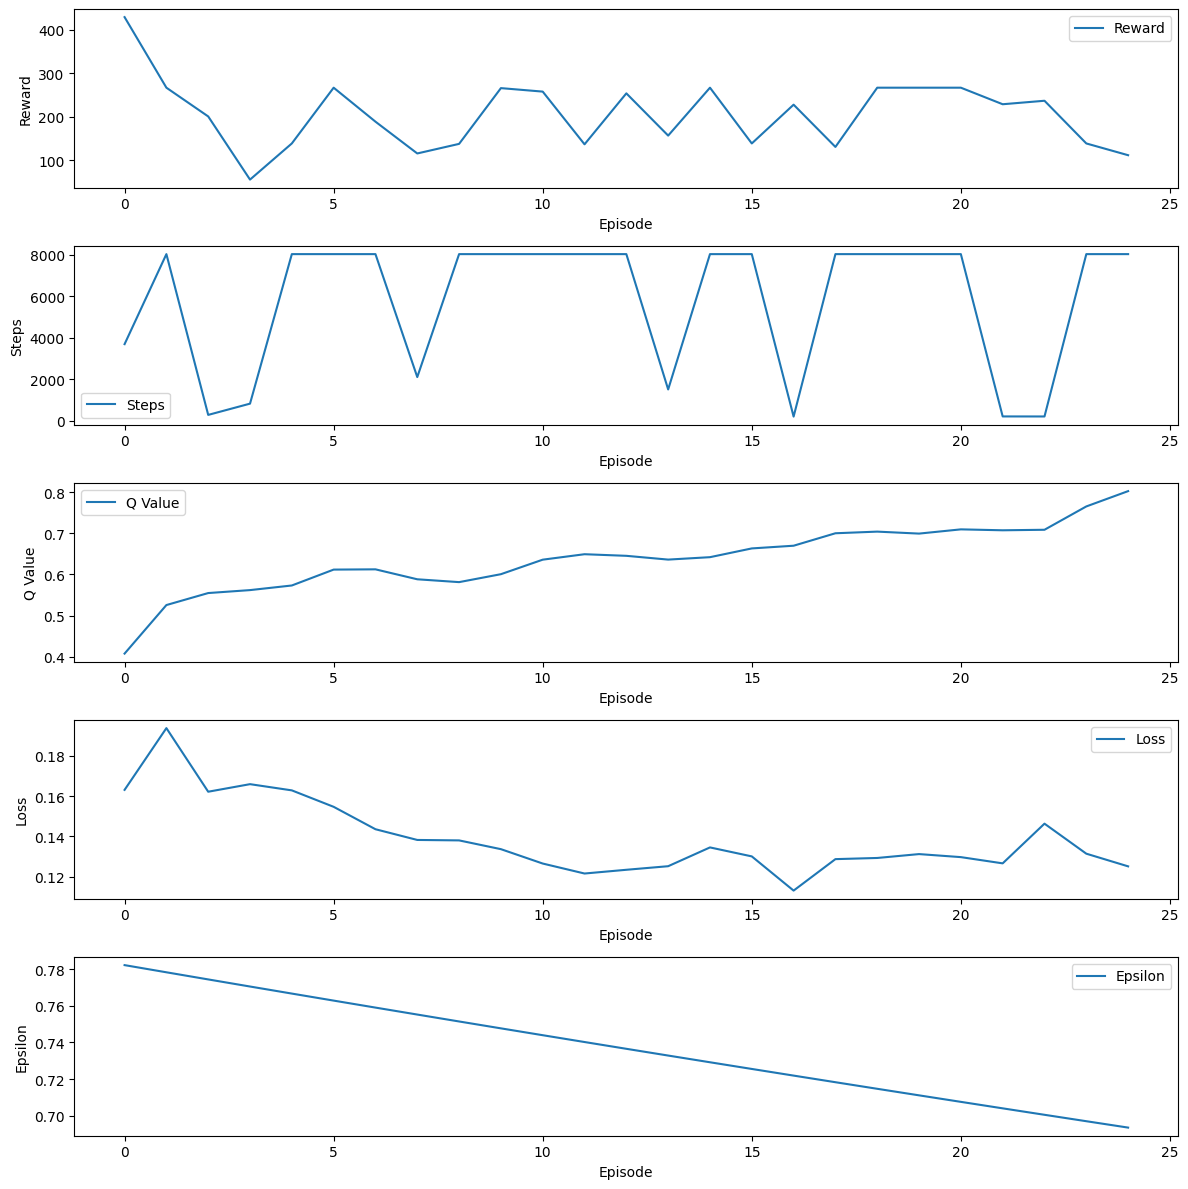

Episode 26 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 139.0, Epsilon: 0.6900935609921609


Episode 27 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 139.0, Epsilon: 0.6866430931872001


Episode 28 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 139.0, Epsilon: 0.6832098777212641


Episode 29 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 139.0, Epsilon: 0.6797938283326578


Episode 30 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 139.0, Epsilon: 0.6763948591909945


Episode 31 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 139.0, Epsilon: 0.6730128848950395


Episode 32 abgeschlossen mit 230 Schritten, Gesamtbelohnung: 241.0, Epsilon: 0.6696478204705644


Episode 33 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 139.0, Epsilon: 0.6662995813682115


Episode 34 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 265.0, Epsilon: 0.6629680834613705


Episode 35 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 266.0, Epsilon: 0.6596532430440636


Episode 36 

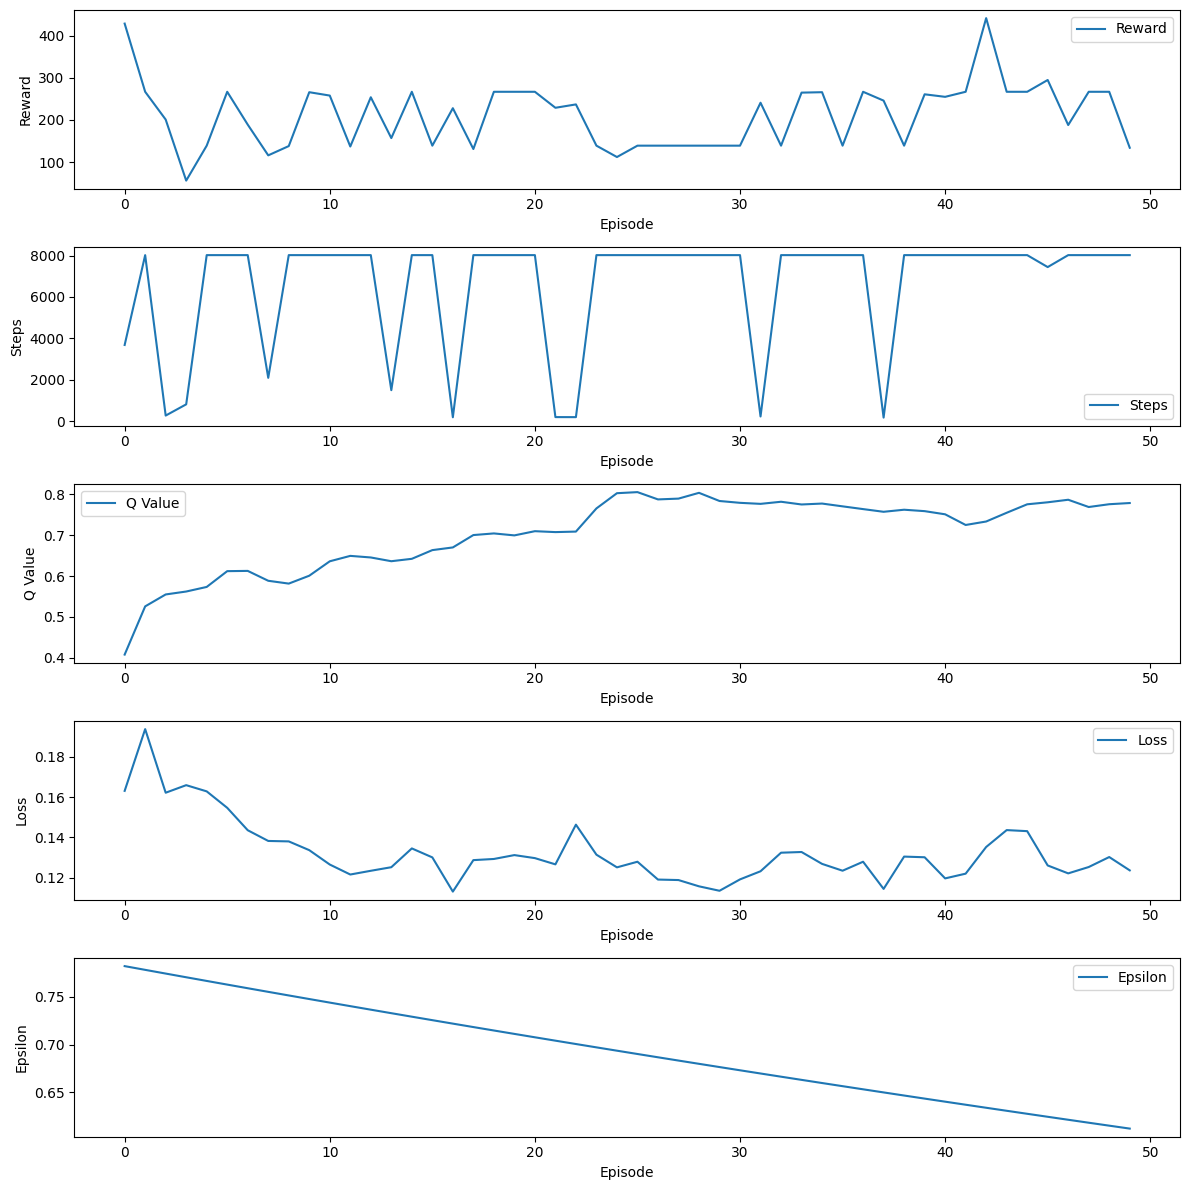

Episode 51 abgeschlossen mit 2584 Schritten, Gesamtbelohnung: 505.0, Epsilon: 0.6088145090359074


Episode 52 abgeschlossen mit 178 Schritten, Gesamtbelohnung: 235.0, Epsilon: 0.6057704364907278


Episode 53 abgeschlossen mit 6996 Schritten, Gesamtbelohnung: 421.0, Epsilon: 0.6027415843082742


Episode 54 abgeschlossen mit 1044 Schritten, Gesamtbelohnung: 158.0, Epsilon: 0.5997278763867329


Episode 55 abgeschlossen mit 2976 Schritten, Gesamtbelohnung: 82.0, Epsilon: 0.5967292370047992


Episode 56 abgeschlossen mit 362 Schritten, Gesamtbelohnung: 220.0, Epsilon: 0.5937455908197752


Episode 57 abgeschlossen mit 174 Schritten, Gesamtbelohnung: 232.0, Epsilon: 0.5907768628656763


Episode 58 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 267.0, Epsilon: 0.5878229785513479


Episode 59 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 241.0, Epsilon: 0.5848838636585911


Episode 60 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 255.0, Epsilon: 0.5819594443402982


Episode 61 abg

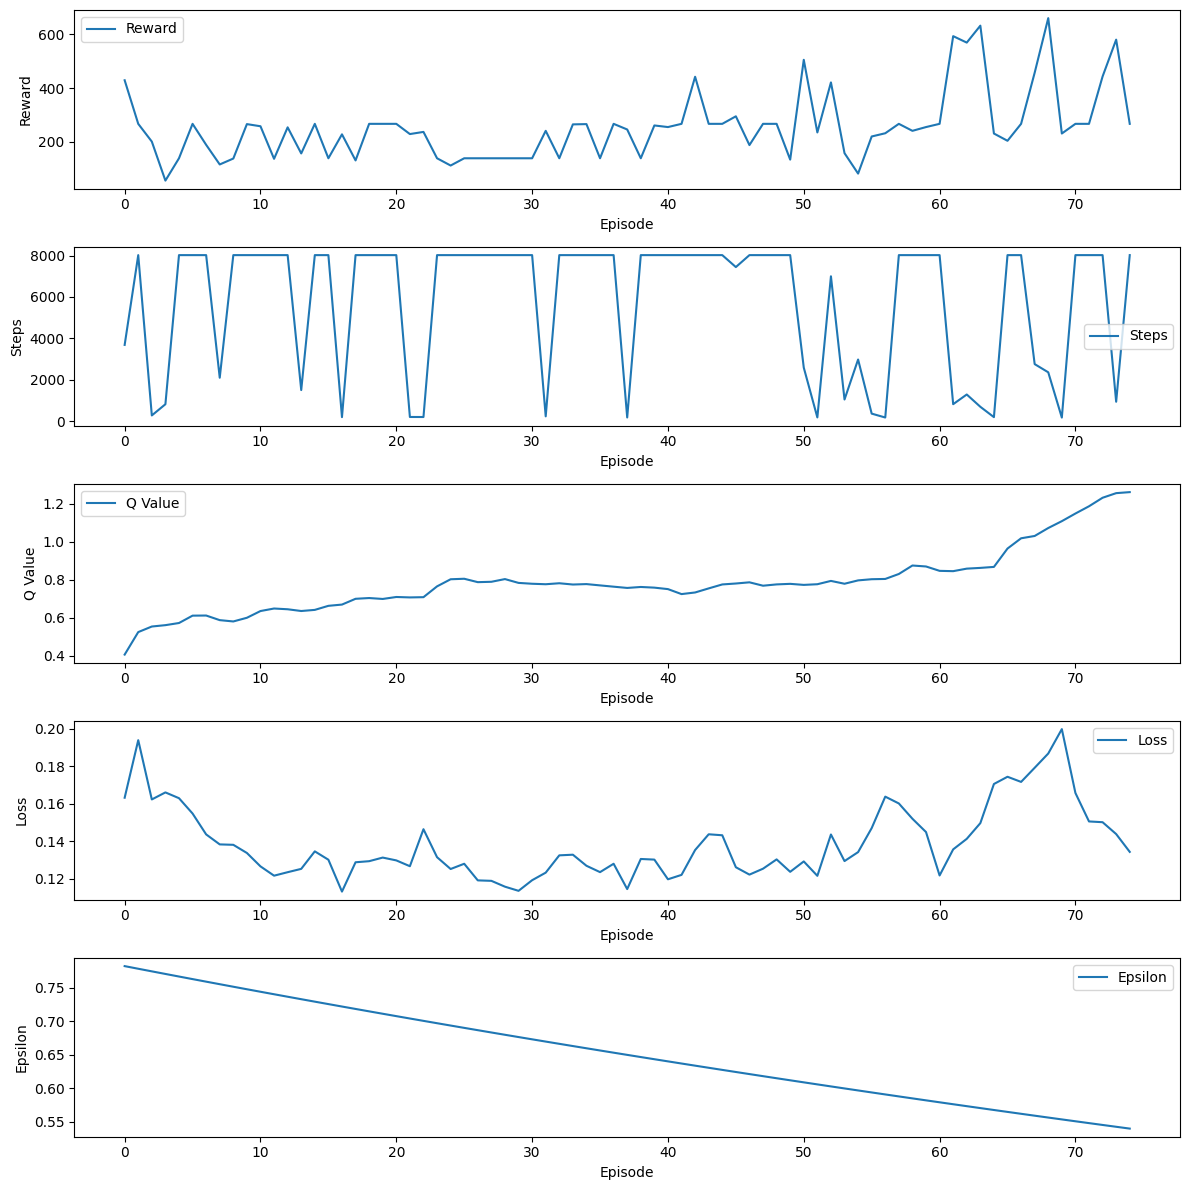

Episode 76 abgeschlossen mit 7765 Schritten, Gesamtbelohnung: 679.0, Epsilon: 0.5371084840724134


Episode 77 abgeschlossen mit 192 Schritten, Gesamtbelohnung: 230.0, Epsilon: 0.5344229416520513


Episode 78 abgeschlossen mit 4208 Schritten, Gesamtbelohnung: 602.0, Epsilon: 0.531750826943791


Episode 79 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 267.0, Epsilon: 0.5290920728090721


Episode 80 abgeschlossen mit 204 Schritten, Gesamtbelohnung: 216.0, Epsilon: 0.5264466124450268


Episode 81 abgeschlossen mit 638 Schritten, Gesamtbelohnung: 592.0, Epsilon: 0.5238143793828016


Episode 82 abgeschlossen mit 172 Schritten, Gesamtbelohnung: 231.0, Epsilon: 0.5211953074858876


Episode 83 abgeschlossen mit 212 Schritten, Gesamtbelohnung: 226.0, Epsilon: 0.5185893309484582


Episode 84 abgeschlossen mit 938 Schritten, Gesamtbelohnung: 621.0, Epsilon: 0.5159963842937159


Episode 85 abgeschlossen mit 1006 Schritten, Gesamtbelohnung: 793.0, Epsilon: 0.5134164023722473


Episode 86 abgesc

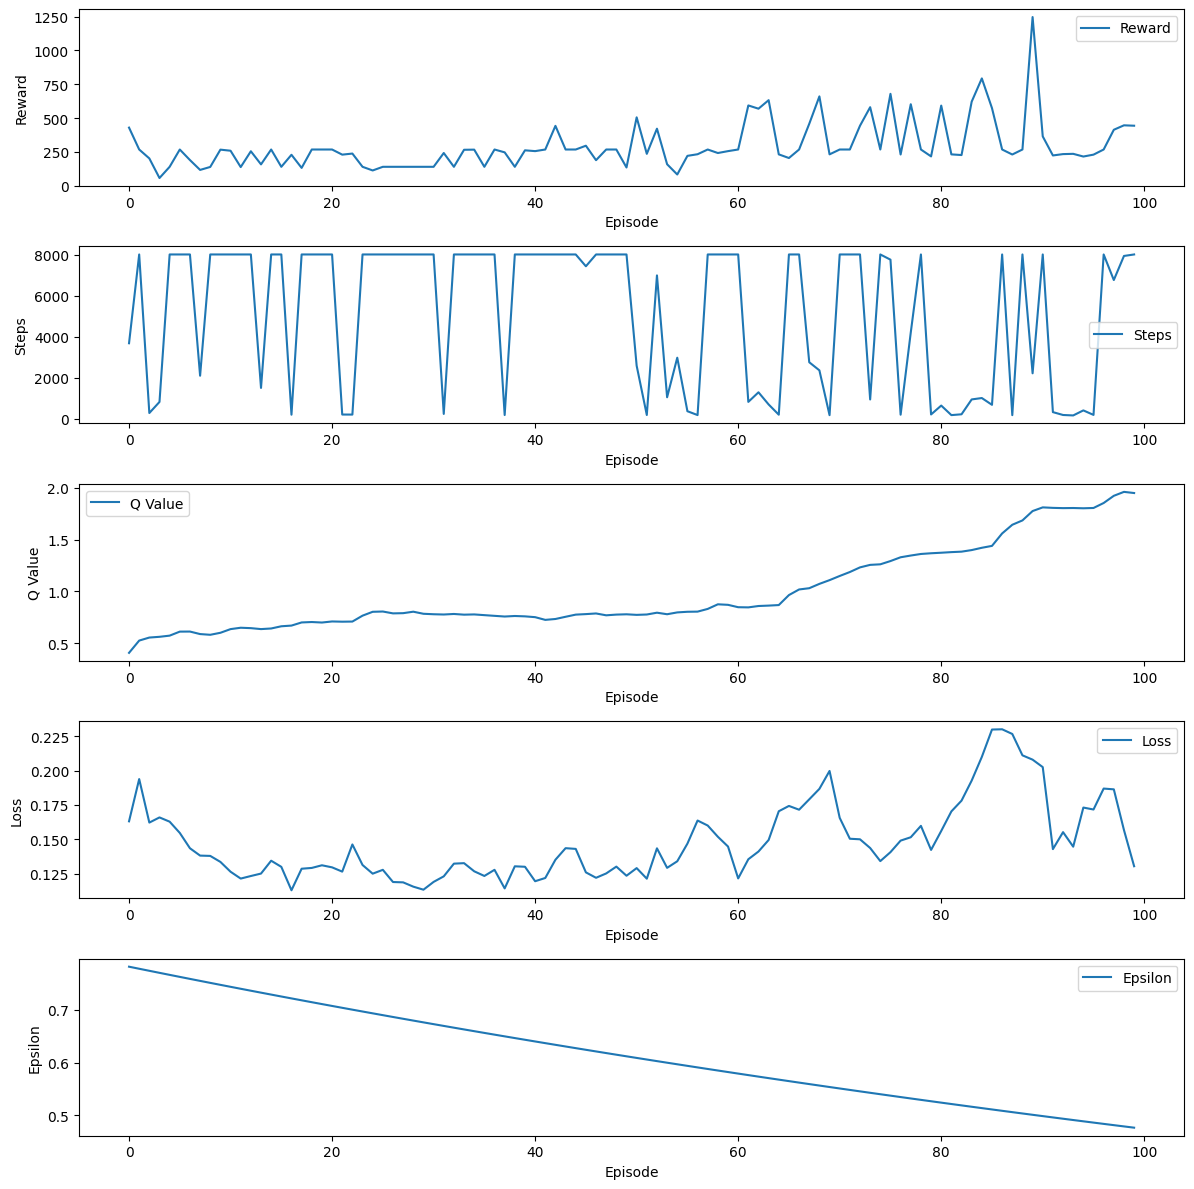

Episode 101 abgeschlossen mit 3724 Schritten, Gesamtbelohnung: 601.0, Epsilon: 0.4738479773082268


Episode 102 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 443.0, Epsilon: 0.47147873742168567


Episode 103 abgeschlossen mit 6993 Schritten, Gesamtbelohnung: 730.0, Epsilon: 0.46912134373457726


Episode 104 abgeschlossen mit 8019 Schritten, Gesamtbelohnung: 267.0, Epsilon: 0.46677573701590436


Episode 105 abgeschlossen mit 2816 Schritten, Gesamtbelohnung: 634.0, Epsilon: 0.46444185833082485


Episode 106 abgeschlossen mit 174 Schritten, Gesamtbelohnung: 238.0, Epsilon: 0.46211964903917074


Episode 107 abgeschlossen mit 326 Schritten, Gesamtbelohnung: 224.0, Epsilon: 0.4598090507939749


Episode 108 abgeschlossen mit 220 Schritten, Gesamtbelohnung: 212.0, Epsilon: 0.457510005540005


Episode 109 abgeschlossen mit 3700 Schritten, Gesamtbelohnung: 482.0, Epsilon: 0.45522245551230495


Episode 110 abgeschlossen mit 162 Schritten, Gesamtbelohnung: 237.0, Epsilon: 0.4529463432347434



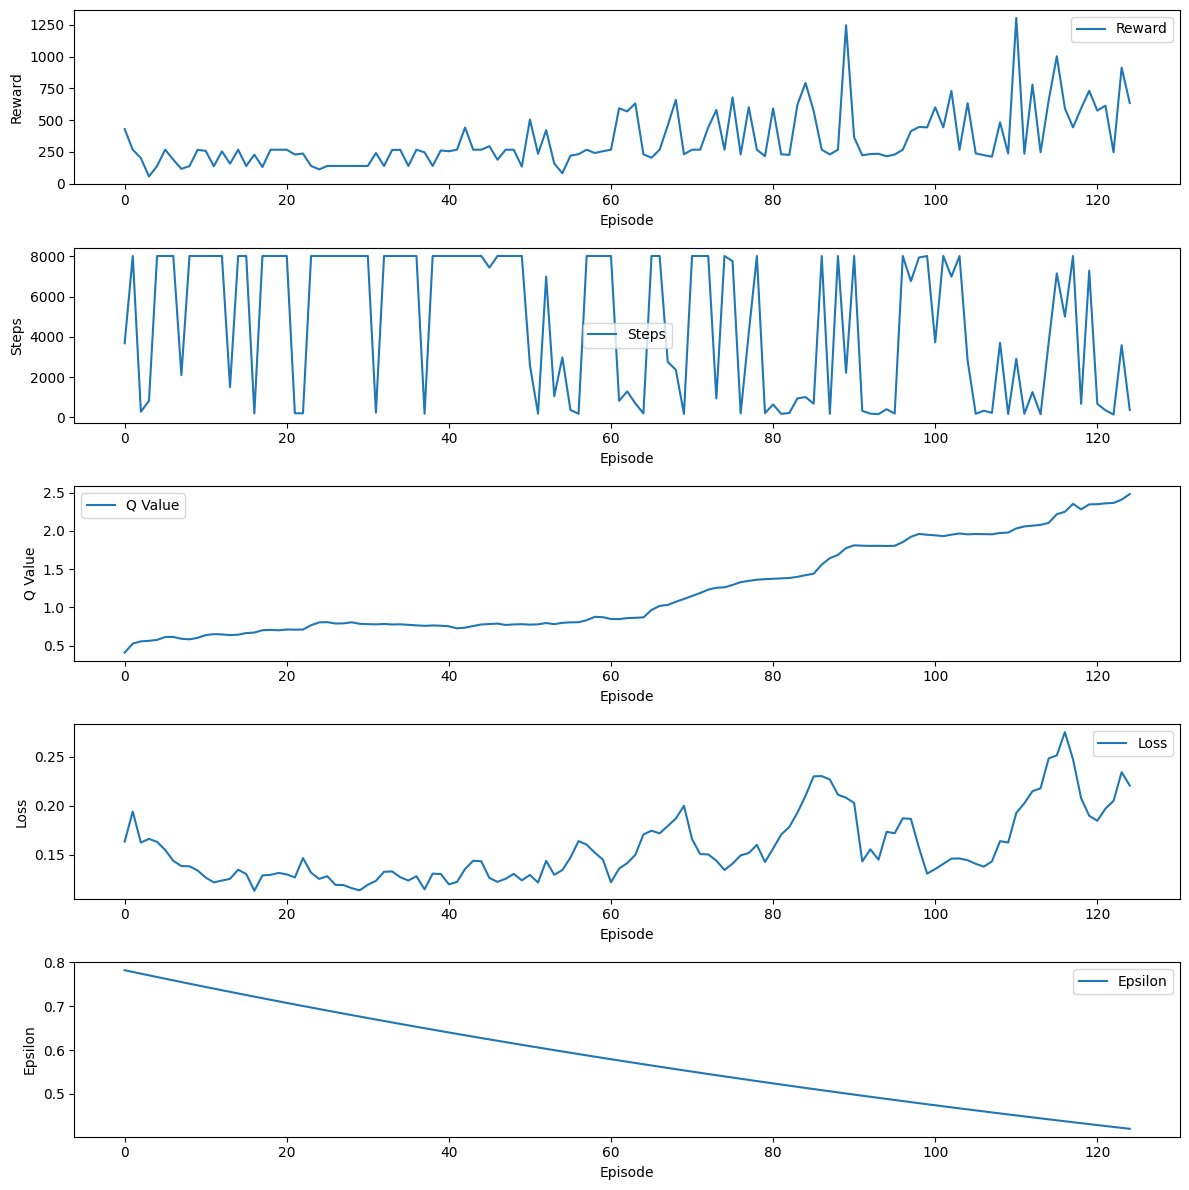

Episode 126 abgeschlossen mit 5336 Schritten, Gesamtbelohnung: 577.0, Epsilon: 0.4180382776616619


Episode 127 abgeschlossen mit 130 Schritten, Gesamtbelohnung: 252.0, Epsilon: 0.4159480862733536


Episode 128 abgeschlossen mit 2023 Schritten, Gesamtbelohnung: 989.0, Epsilon: 0.41386834584198684


Episode 129 abgeschlossen mit 128 Schritten, Gesamtbelohnung: 249.0, Epsilon: 0.4117990041127769


Episode 130 abgeschlossen mit 126 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.40974000909221303


Episode 131 abgeschlossen mit 582 Schritten, Gesamtbelohnung: 638.0, Epsilon: 0.40769130904675194


Episode 132 abgeschlossen mit 3656 Schritten, Gesamtbelohnung: 615.0, Epsilon: 0.40565285250151817


Episode 133 abgeschlossen mit 700 Schritten, Gesamtbelohnung: 808.0, Epsilon: 0.4036245882390106


Episode 134 abgeschlossen mit 134 Schritten, Gesamtbelohnung: 252.0, Epsilon: 0.4016064652978155


Episode 135 abgeschlossen mit 138 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.3995984329713264


Epi

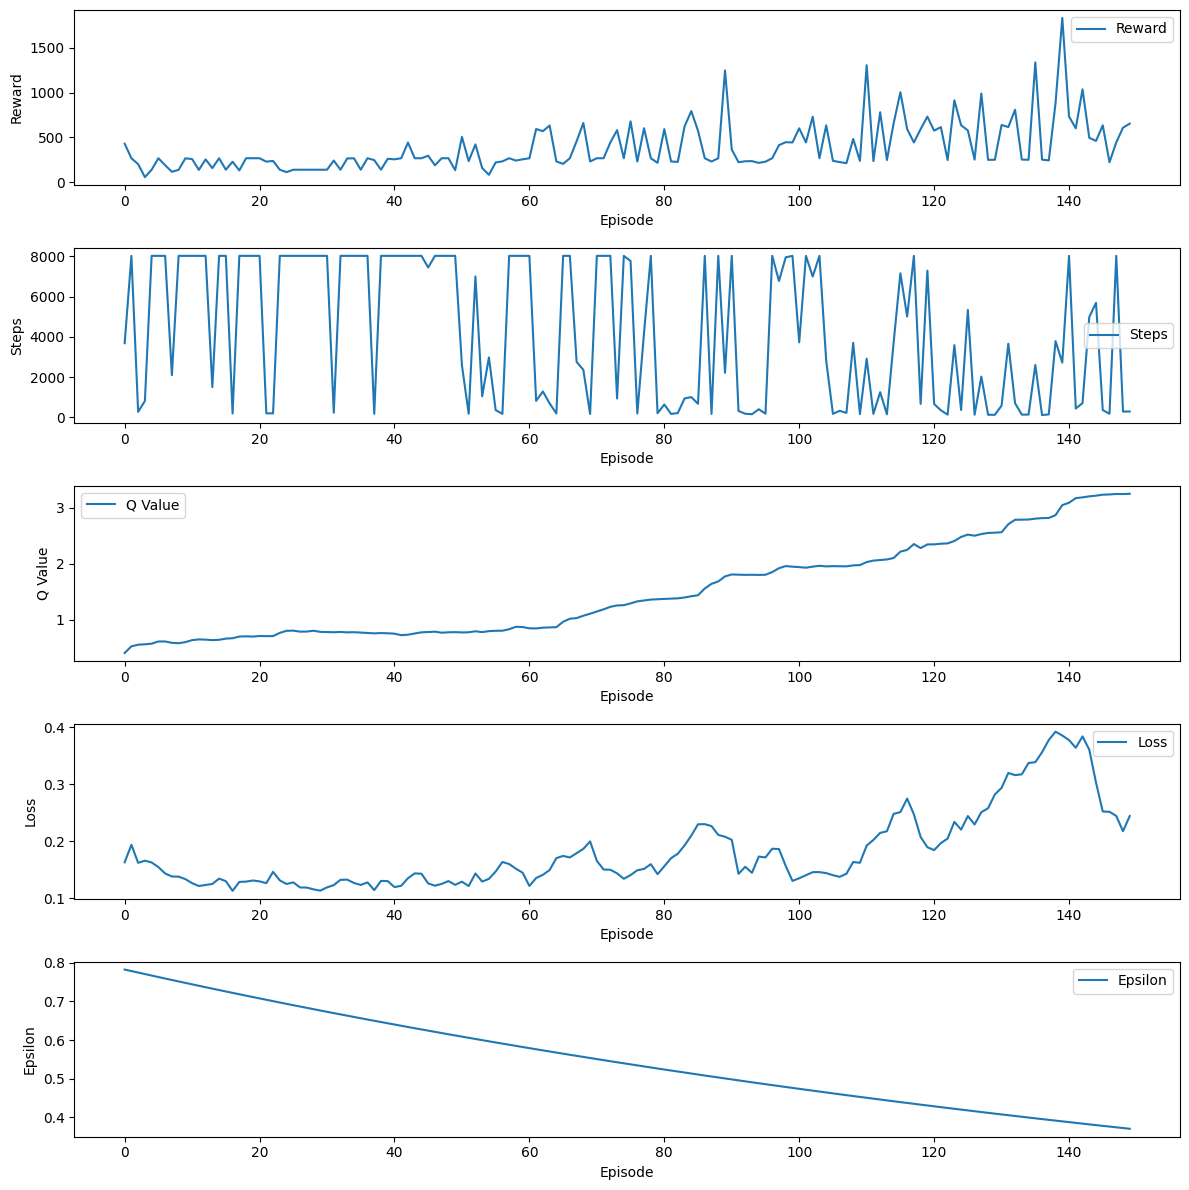

Episode 151 abgeschlossen mit 186 Schritten, Gesamtbelohnung: 237.0, Epsilon: 0.36880183088056995


Episode 152 abgeschlossen mit 7486 Schritten, Gesamtbelohnung: 813.0, Epsilon: 0.3669578217261671


Episode 153 abgeschlossen mit 1810 Schritten, Gesamtbelohnung: 1879.0, Epsilon: 0.36512303261753626


Episode 154 abgeschlossen mit 3113 Schritten, Gesamtbelohnung: 916.0, Epsilon: 0.3632974174544486


Episode 155 abgeschlossen mit 146 Schritten, Gesamtbelohnung: 237.0, Epsilon: 0.3614809303671764


Episode 156 abgeschlossen mit 2709 Schritten, Gesamtbelohnung: 1234.0, Epsilon: 0.3596735257153405


Episode 157 abgeschlossen mit 2492 Schritten, Gesamtbelohnung: 719.0, Epsilon: 0.3578751580867638


Episode 158 abgeschlossen mit 1654 Schritten, Gesamtbelohnung: 1292.0, Epsilon: 0.35608578229633


Episode 159 abgeschlossen mit 300 Schritten, Gesamtbelohnung: 652.0, Epsilon: 0.3543053533848483


Episode 160 abgeschlossen mit 978 Schritten, Gesamtbelohnung: 744.0, Epsilon: 0.35253382661792404




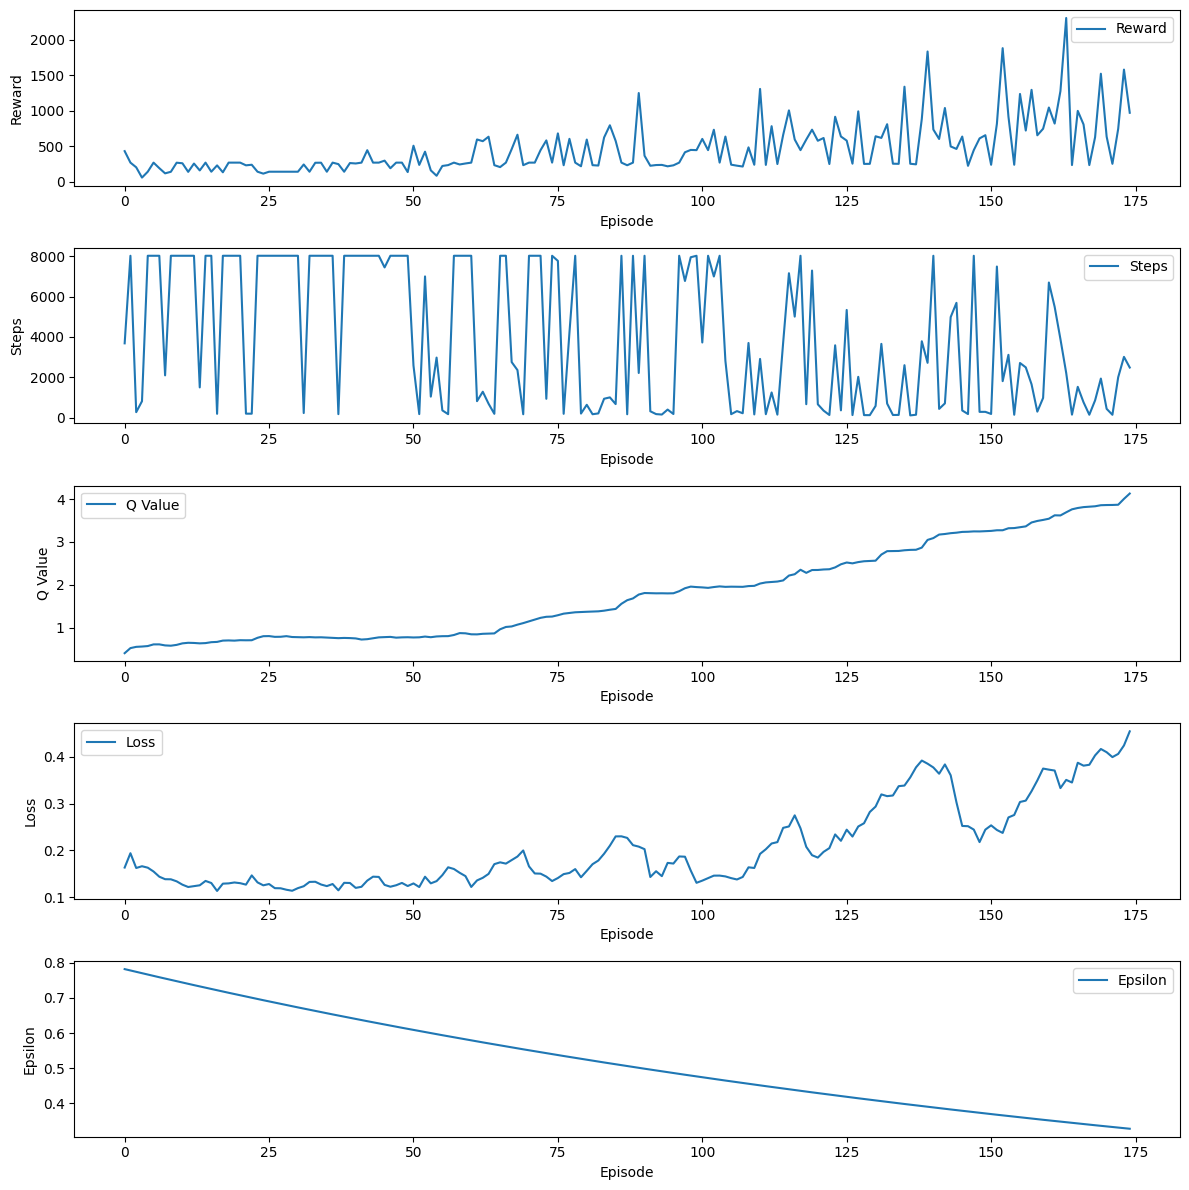

Episode 176 abgeschlossen mit 568 Schritten, Gesamtbelohnung: 623.0, Epsilon: 0.3253644408394192


Episode 177 abgeschlossen mit 284 Schritten, Gesamtbelohnung: 653.0, Epsilon: 0.3237376186352221


Episode 178 abgeschlossen mit 1718 Schritten, Gesamtbelohnung: 758.0, Epsilon: 0.322118930542046


Episode 179 abgeschlossen mit 348 Schritten, Gesamtbelohnung: 637.0, Epsilon: 0.32050833588933575


Episode 180 abgeschlossen mit 132 Schritten, Gesamtbelohnung: 248.0, Epsilon: 0.31890579420988907


Episode 181 abgeschlossen mit 174 Schritten, Gesamtbelohnung: 232.0, Epsilon: 0.3173112652388396


Episode 182 abgeschlossen mit 148 Schritten, Gesamtbelohnung: 243.0, Epsilon: 0.3157247089126454


Episode 183 abgeschlossen mit 1386 Schritten, Gesamtbelohnung: 720.0, Epsilon: 0.3141460853680822


Episode 184 abgeschlossen mit 670 Schritten, Gesamtbelohnung: 603.0, Epsilon: 0.3125753549412418


Episode 185 abgeschlossen mit 314 Schritten, Gesamtbelohnung: 631.0, Epsilon: 0.31101247816653554


Episod

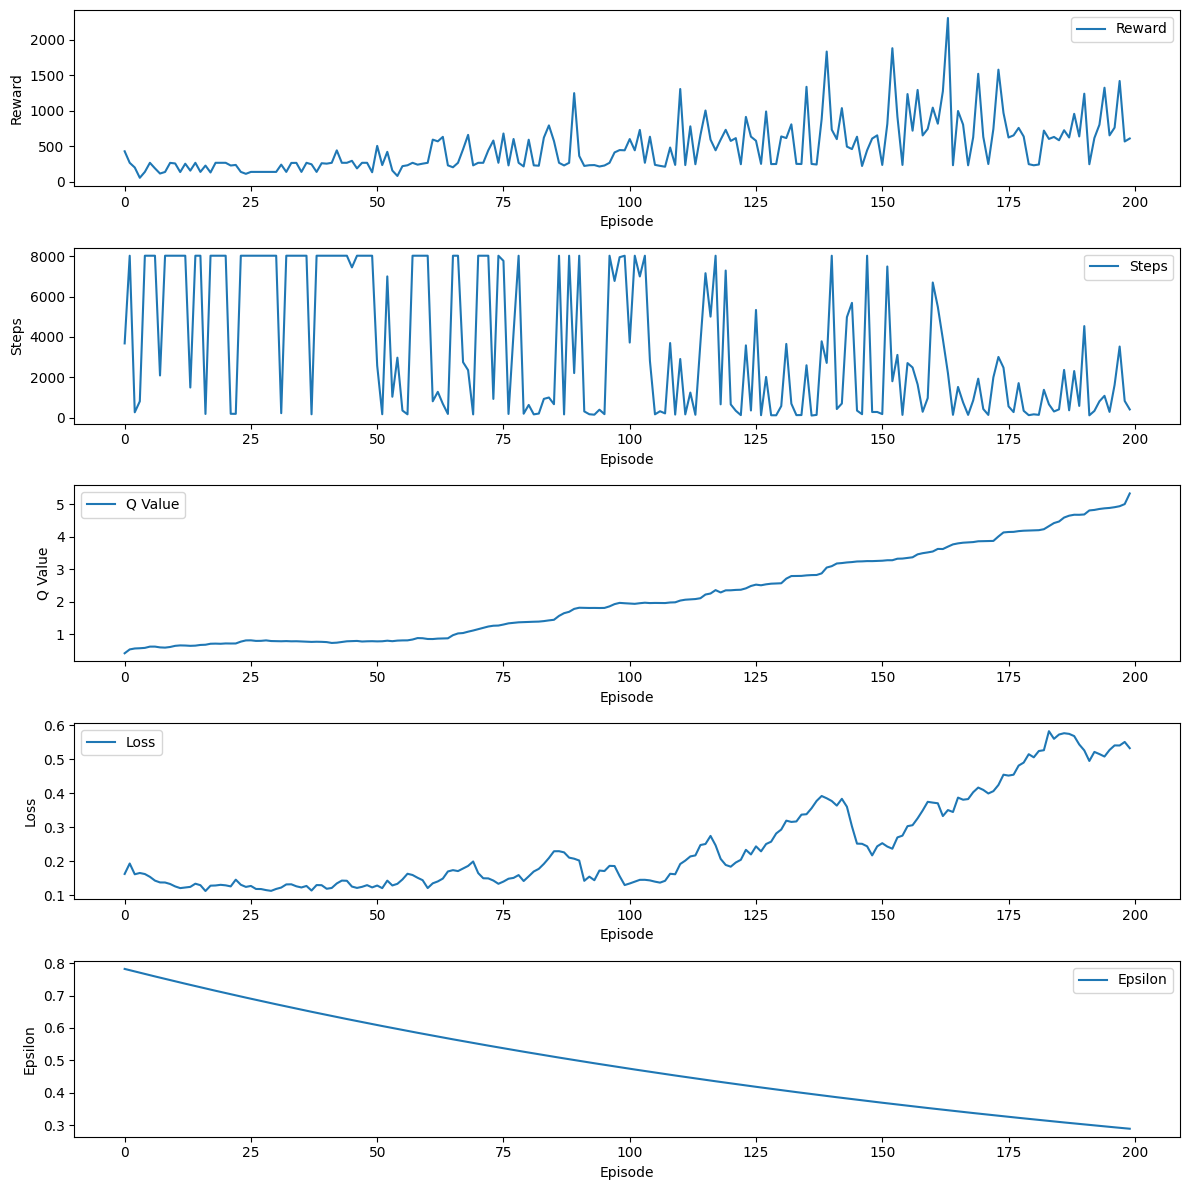

Episode 201 abgeschlossen mit 2737 Schritten, Gesamtbelohnung: 955.0, Epsilon: 0.28704309604425327


Episode 202 abgeschlossen mit 1000 Schritten, Gesamtbelohnung: 793.0, Epsilon: 0.285607880564032


Episode 203 abgeschlossen mit 782 Schritten, Gesamtbelohnung: 628.0, Epsilon: 0.28417984116121187


Episode 204 abgeschlossen mit 2926 Schritten, Gesamtbelohnung: 926.0, Epsilon: 0.2827589419554058


Episode 205 abgeschlossen mit 132 Schritten, Gesamtbelohnung: 249.0, Epsilon: 0.28134514724562876


Episode 206 abgeschlossen mit 3006 Schritten, Gesamtbelohnung: 1223.0, Epsilon: 0.2799384215094006


Episode 207 abgeschlossen mit 1058 Schritten, Gesamtbelohnung: 732.0, Epsilon: 0.27853872940185365


Episode 208 abgeschlossen mit 582 Schritten, Gesamtbelohnung: 732.0, Epsilon: 0.27714603575484437


Episode 209 abgeschlossen mit 728 Schritten, Gesamtbelohnung: 807.0, Epsilon: 0.2757603055760701


Episode 210 abgeschlossen mit 1310 Schritten, Gesamtbelohnung: 1400.0, Epsilon: 0.2743815040481898


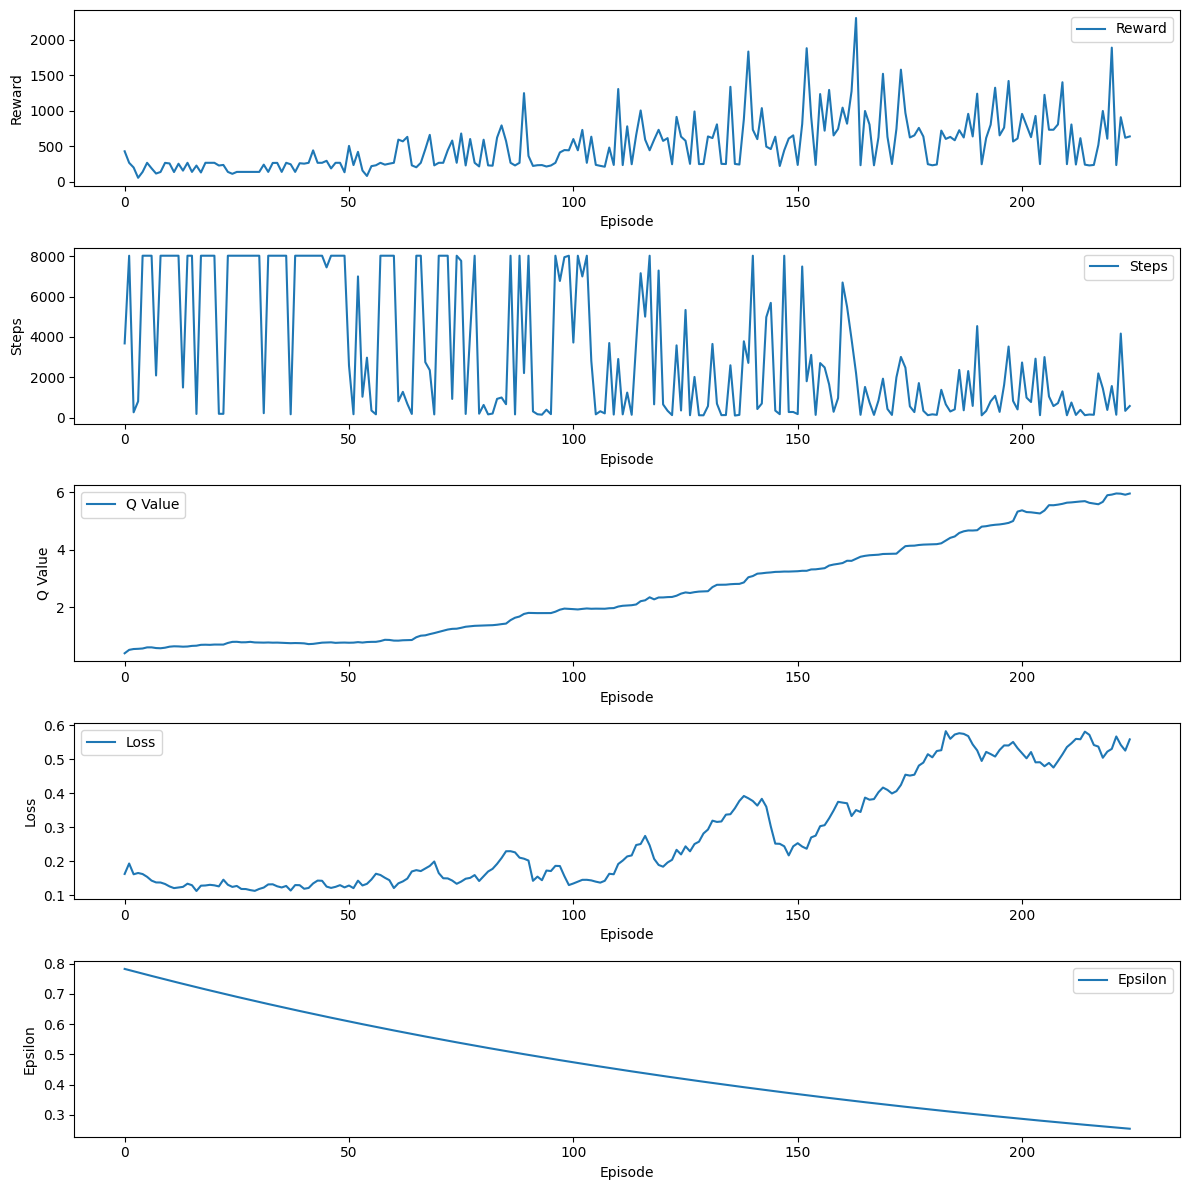

Episode 226 abgeschlossen mit 136 Schritten, Gesamtbelohnung: 236.0, Epsilon: 0.2532352299289372


Episode 227 abgeschlossen mit 1590 Schritten, Gesamtbelohnung: 1297.0, Epsilon: 0.2519690537792925


Episode 228 abgeschlossen mit 995 Schritten, Gesamtbelohnung: 1313.0, Epsilon: 0.2507092085103961


Episode 229 abgeschlossen mit 1058 Schritten, Gesamtbelohnung: 791.0, Epsilon: 0.2494556624678441


Episode 230 abgeschlossen mit 808 Schritten, Gesamtbelohnung: 1562.0, Epsilon: 0.24820838415550486


Episode 231 abgeschlossen mit 116 Schritten, Gesamtbelohnung: 247.0, Epsilon: 0.24696734223472733


Episode 232 abgeschlossen mit 1052 Schritten, Gesamtbelohnung: 1328.0, Epsilon: 0.2457325055235537


Episode 233 abgeschlossen mit 1240 Schritten, Gesamtbelohnung: 1842.0, Epsilon: 0.24450384299593592


Episode 234 abgeschlossen mit 1836 Schritten, Gesamtbelohnung: 1286.0, Epsilon: 0.24328132378095624


Episode 235 abgeschlossen mit 1238 Schritten, Gesamtbelohnung: 1404.0, Epsilon: 0.242064917162

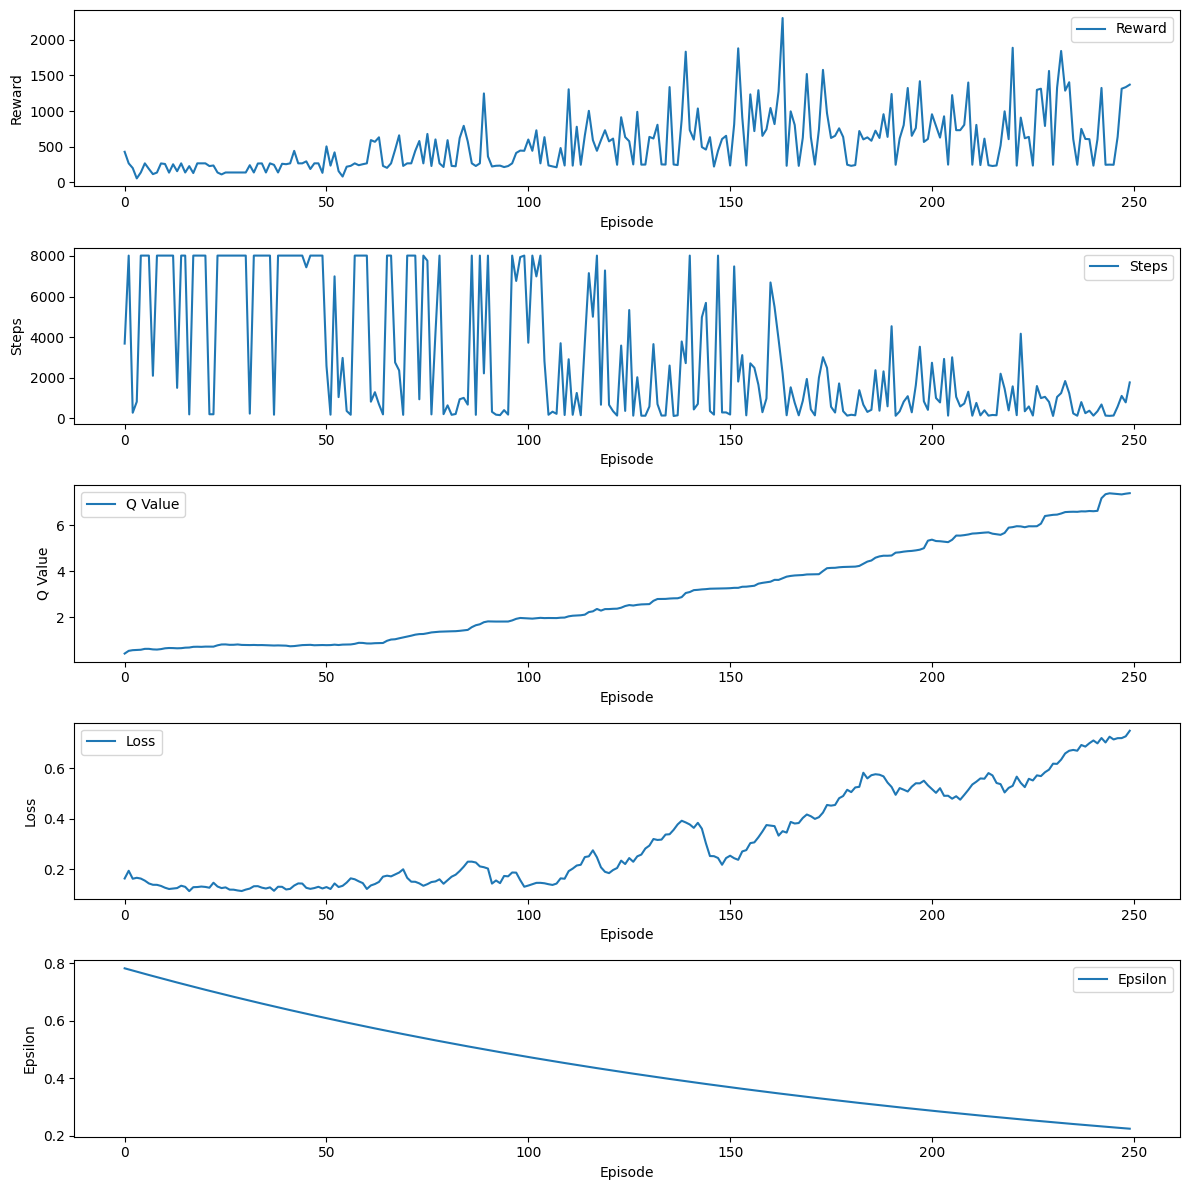

Episode 251 abgeschlossen mit 2273 Schritten, Gesamtbelohnung: 958.0, Epsilon: 0.22340924607110255


Episode 252 abgeschlossen mit 268 Schritten, Gesamtbelohnung: 603.0, Epsilon: 0.22229219984074702


Episode 253 abgeschlossen mit 526 Schritten, Gesamtbelohnung: 723.0, Epsilon: 0.2211807388415433


Episode 254 abgeschlossen mit 994 Schritten, Gesamtbelohnung: 1022.0, Epsilon: 0.22007483514733558


Episode 255 abgeschlossen mit 148 Schritten, Gesamtbelohnung: 236.0, Epsilon: 0.2189744609715989


Episode 256 abgeschlossen mit 348 Schritten, Gesamtbelohnung: 626.0, Epsilon: 0.2178795886667409


Episode 257 abgeschlossen mit 868 Schritten, Gesamtbelohnung: 752.0, Epsilon: 0.2167901907234072


Episode 258 abgeschlossen mit 320 Schritten, Gesamtbelohnung: 625.0, Epsilon: 0.21570623976979014


Episode 259 abgeschlossen mit 540 Schritten, Gesamtbelohnung: 640.0, Epsilon: 0.21462770857094118


Episode 260 abgeschlossen mit 819 Schritten, Gesamtbelohnung: 1338.0, Epsilon: 0.21355457002808648


E

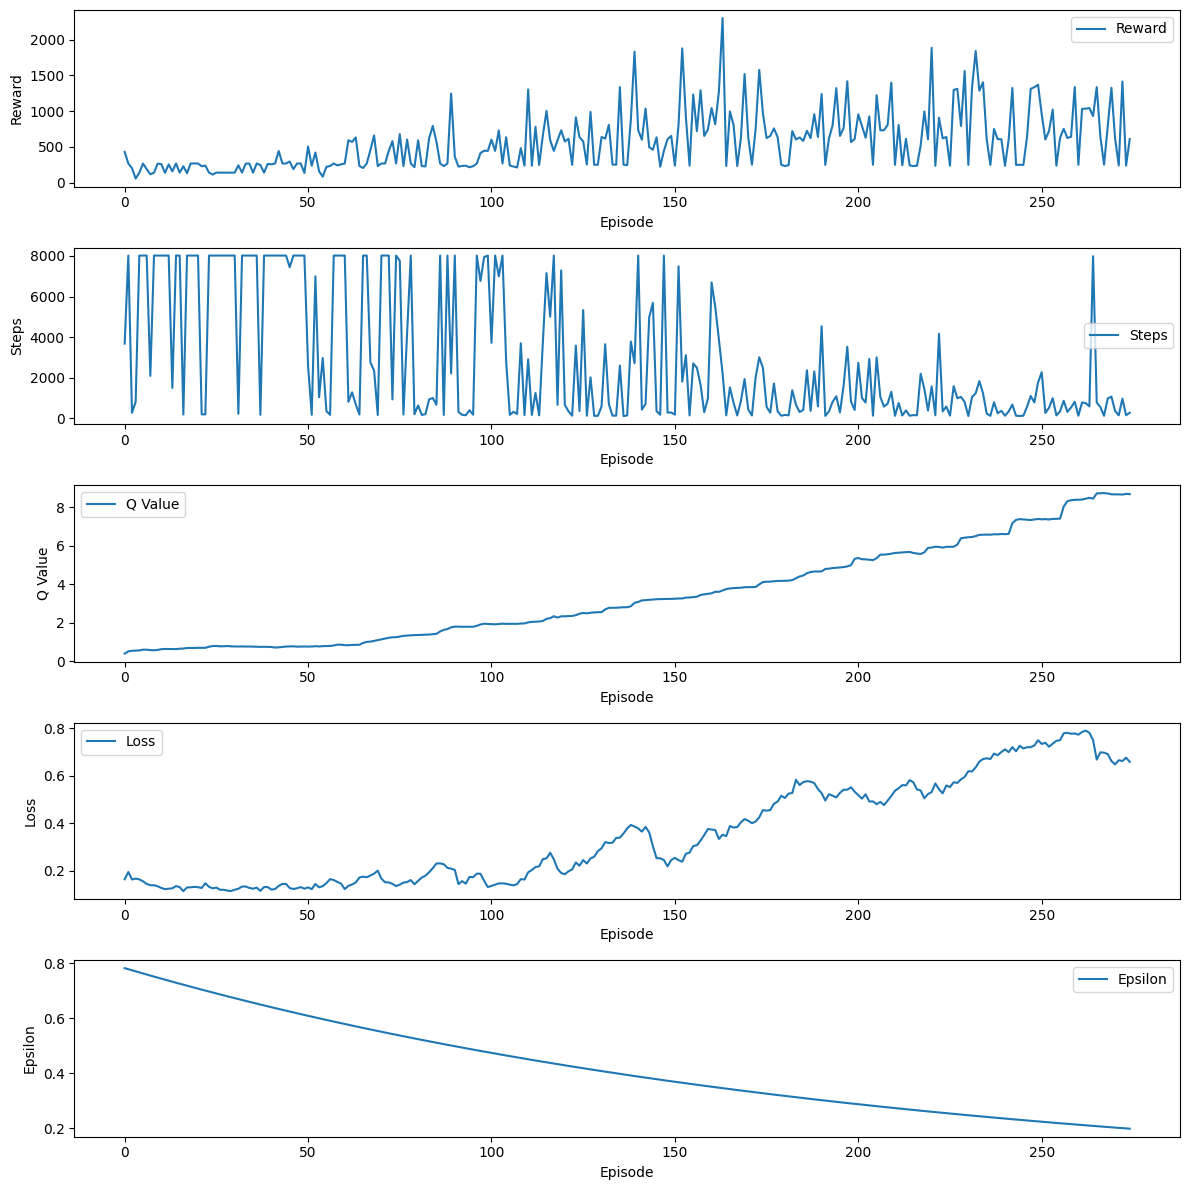

Episode 276 abgeschlossen mit 746 Schritten, Gesamtbelohnung: 730.0, Epsilon: 0.19709615934585656


Episode 277 abgeschlossen mit 560 Schritten, Gesamtbelohnung: 1044.0, Epsilon: 0.19611067854912728


Episode 278 abgeschlossen mit 655 Schritten, Gesamtbelohnung: 1335.0, Epsilon: 0.19513012515638165


Episode 279 abgeschlossen mit 739 Schritten, Gesamtbelohnung: 1036.0, Epsilon: 0.19415447453059972


Episode 280 abgeschlossen mit 254 Schritten, Gesamtbelohnung: 182.0, Epsilon: 0.19318370215794672


Episode 281 abgeschlossen mit 1188 Schritten, Gesamtbelohnung: 1013.0, Epsilon: 0.192217783647157


Episode 282 abgeschlossen mit 128 Schritten, Gesamtbelohnung: 249.0, Epsilon: 0.1912566947289212


Episode 283 abgeschlossen mit 466 Schritten, Gesamtbelohnung: 632.0, Epsilon: 0.1903004112552766


Episode 284 abgeschlossen mit 1878 Schritten, Gesamtbelohnung: 707.0, Epsilon: 0.18934890919900021


Episode 285 abgeschlossen mit 136 Schritten, Gesamtbelohnung: 242.0, Epsilon: 0.18840216465300522


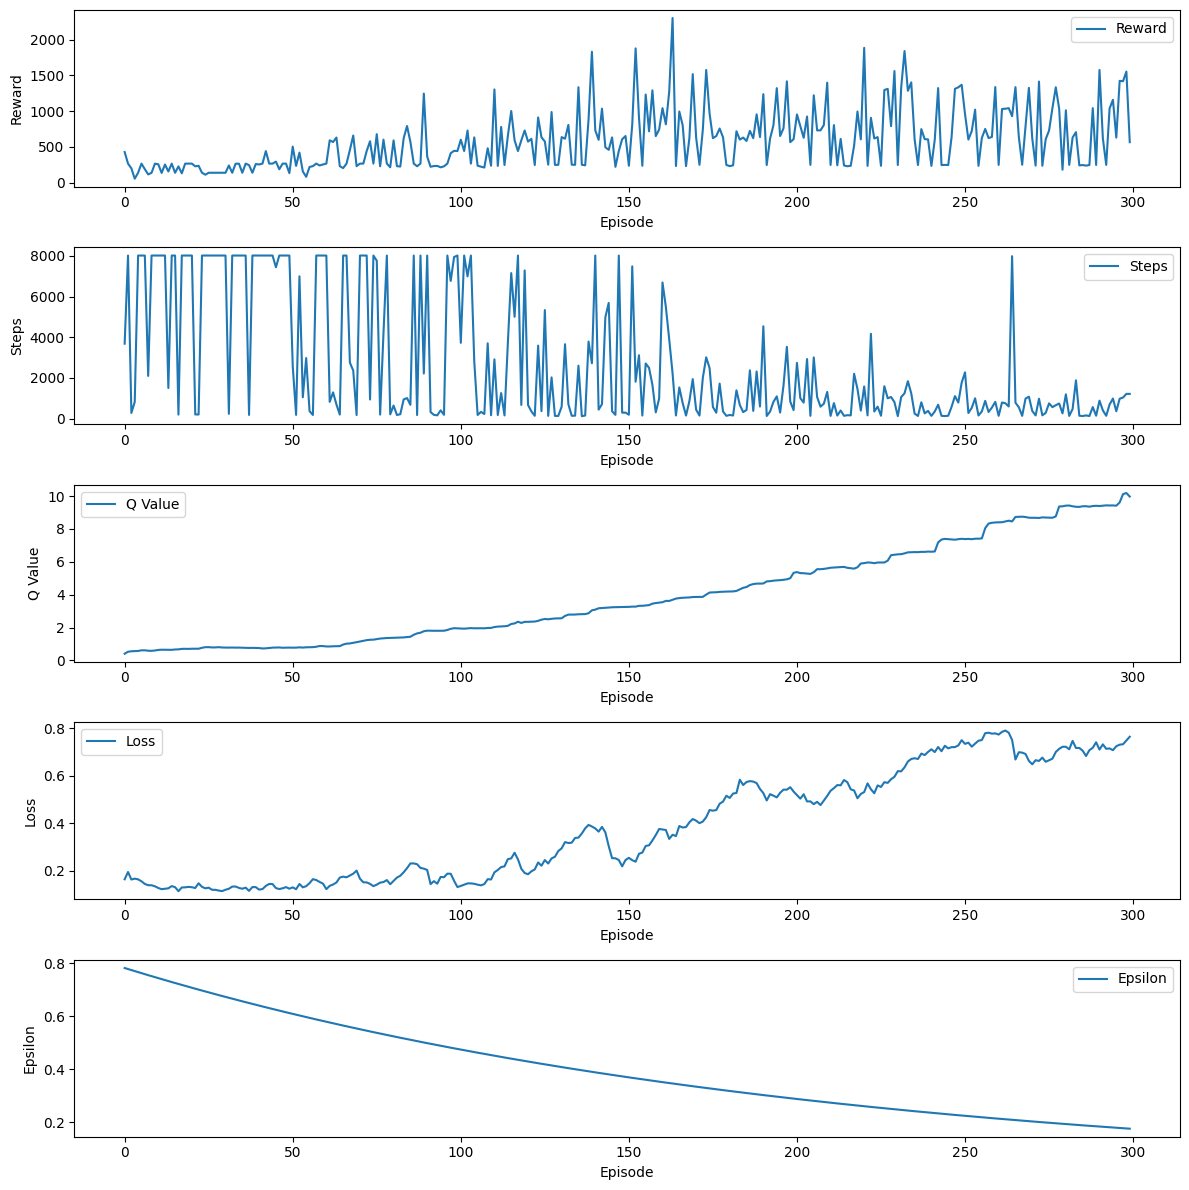

Episode 301 abgeschlossen mit 1409 Schritten, Gesamtbelohnung: 2345.0, Epsilon: 0.17388222158237718


Episode 302 abgeschlossen mit 912 Schritten, Gesamtbelohnung: 1338.0, Epsilon: 0.1730128104744653


Episode 303 abgeschlossen mit 556 Schritten, Gesamtbelohnung: 640.0, Epsilon: 0.17214774642209296


Episode 304 abgeschlossen mit 316 Schritten, Gesamtbelohnung: 612.0, Epsilon: 0.1712870076899825


Episode 305 abgeschlossen mit 310 Schritten, Gesamtbelohnung: 628.0, Epsilon: 0.17043057265153258


Episode 306 abgeschlossen mit 695 Schritten, Gesamtbelohnung: 1341.0, Epsilon: 0.16957841978827493


Episode 307 abgeschlossen mit 580 Schritten, Gesamtbelohnung: 1042.0, Epsilon: 0.16873052768933355


Episode 308 abgeschlossen mit 282 Schritten, Gesamtbelohnung: 604.0, Epsilon: 0.1678868750508869


Episode 309 abgeschlossen mit 522 Schritten, Gesamtbelohnung: 759.0, Epsilon: 0.16704744067563246


Episode 310 abgeschlossen mit 576 Schritten, Gesamtbelohnung: 740.0, Epsilon: 0.1662122034722543



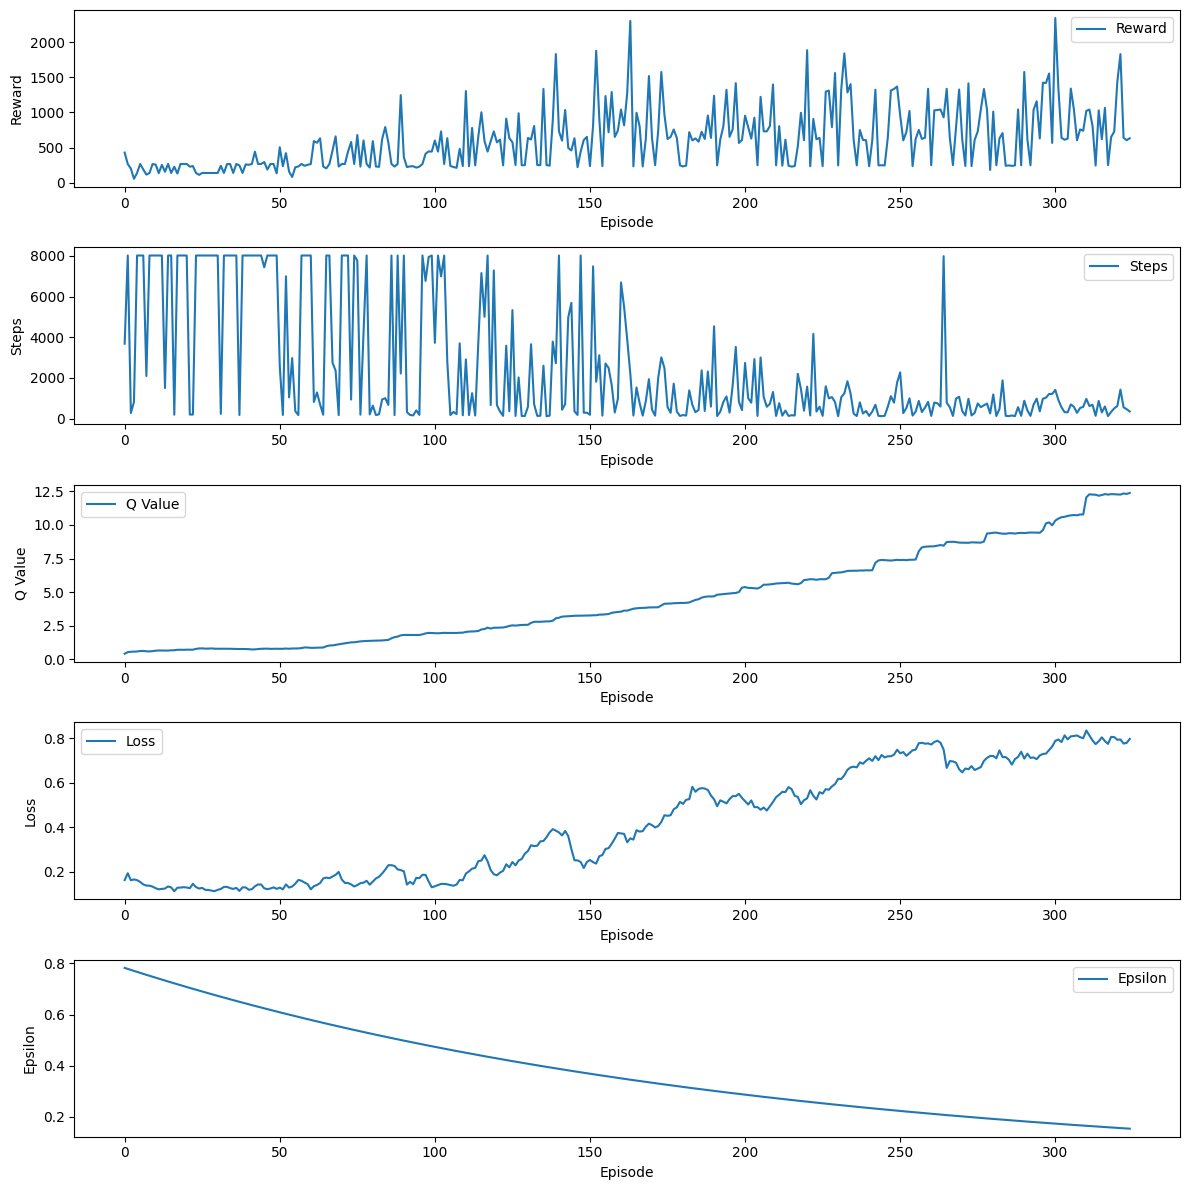

Episode 326 abgeschlossen mit 254 Schritten, Gesamtbelohnung: 609.0, Epsilon: 0.1534024157688821


Episode 327 abgeschlossen mit 338 Schritten, Gesamtbelohnung: 633.0, Epsilon: 0.1526354036900377


Episode 328 abgeschlossen mit 706 Schritten, Gesamtbelohnung: 1582.0, Epsilon: 0.1518722266715875


Episode 329 abgeschlossen mit 346 Schritten, Gesamtbelohnung: 627.0, Epsilon: 0.15111286553822956


Episode 330 abgeschlossen mit 466 Schritten, Gesamtbelohnung: 1147.0, Epsilon: 0.15035730121053842


Episode 331 abgeschlossen mit 352 Schritten, Gesamtbelohnung: 629.0, Epsilon: 0.14960551470448571


Episode 332 abgeschlossen mit 116 Schritten, Gesamtbelohnung: 252.0, Epsilon: 0.14885748713096328


Episode 333 abgeschlossen mit 248 Schritten, Gesamtbelohnung: 610.0, Epsilon: 0.14811319969530845


Episode 334 abgeschlossen mit 340 Schritten, Gesamtbelohnung: 650.0, Epsilon: 0.1473726336968319


Episode 335 abgeschlossen mit 114 Schritten, Gesamtbelohnung: 248.0, Epsilon: 0.14663577052834775


Ep

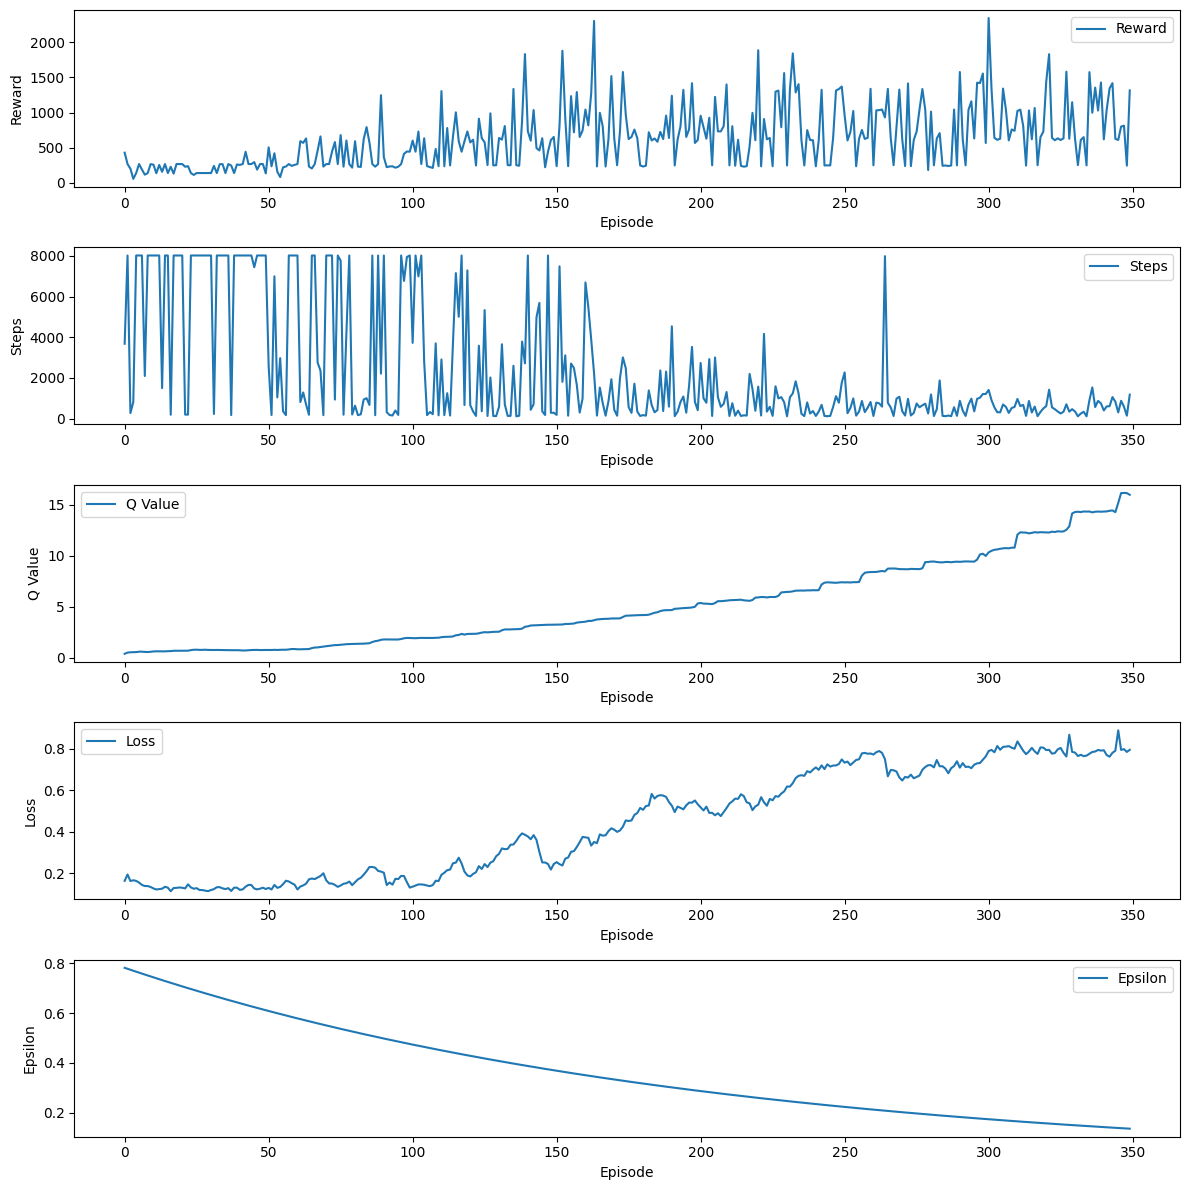

Episode 351 abgeschlossen mit 282 Schritten, Gesamtbelohnung: 608.0, Epsilon: 0.1353347165085562


Episode 352 abgeschlossen mit 296 Schritten, Gesamtbelohnung: 616.0, Epsilon: 0.1346580429260134


Episode 353 abgeschlossen mit 670 Schritten, Gesamtbelohnung: 601.0, Epsilon: 0.13398475271138335


Episode 354 abgeschlossen mit 408 Schritten, Gesamtbelohnung: 613.0, Epsilon: 0.13331482894782642


Episode 355 abgeschlossen mit 270 Schritten, Gesamtbelohnung: 624.0, Epsilon: 0.13264825480308728


Episode 356 abgeschlossen mit 717 Schritten, Gesamtbelohnung: 1328.0, Epsilon: 0.13198501352907185


Episode 357 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 251.0, Epsilon: 0.1313250884614265


Episode 358 abgeschlossen mit 496 Schritten, Gesamtbelohnung: 750.0, Epsilon: 0.13066846301911936


Episode 359 abgeschlossen mit 572 Schritten, Gesamtbelohnung: 764.0, Epsilon: 0.13001512070402377


Episode 360 abgeschlossen mit 130 Schritten, Gesamtbelohnung: 236.0, Epsilon: 0.12936504510050365


Ep

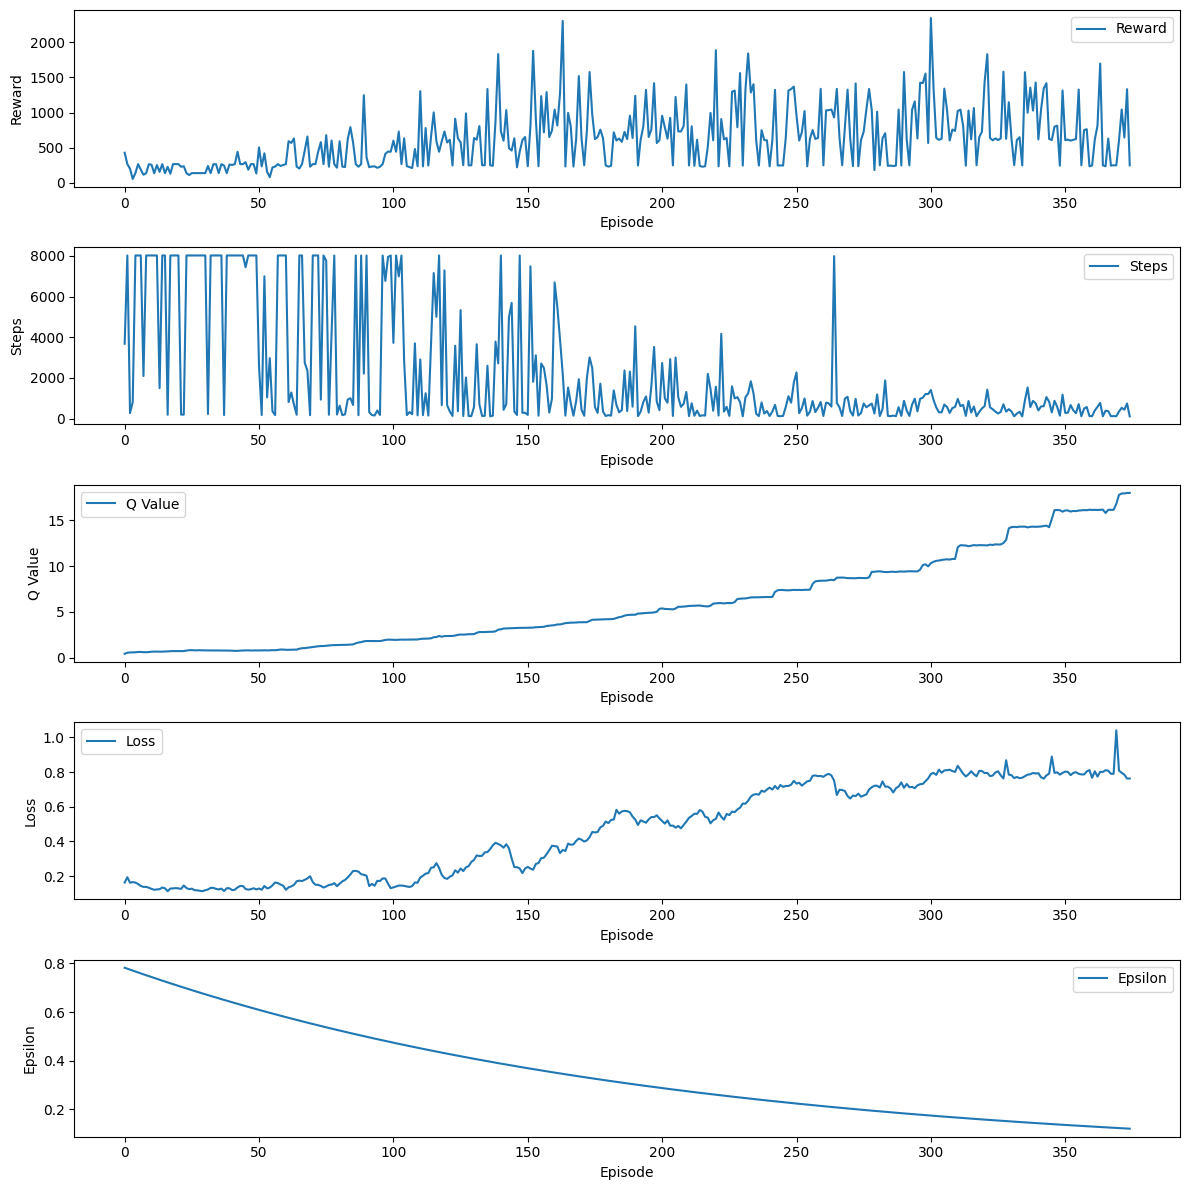

Episode 376 abgeschlossen mit 368 Schritten, Gesamtbelohnung: 630.0, Epsilon: 0.11939502647758558


Episode 377 abgeschlossen mit 384 Schritten, Gesamtbelohnung: 608.0, Epsilon: 0.11879805134519765


Episode 378 abgeschlossen mit 1170 Schritten, Gesamtbelohnung: 1014.0, Epsilon: 0.11820406108847166


Episode 379 abgeschlossen mit 122 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.1176130407830293


Episode 380 abgeschlossen mit 114 Schritten, Gesamtbelohnung: 247.0, Epsilon: 0.11702497557911415


Episode 381 abgeschlossen mit 752 Schritten, Gesamtbelohnung: 1428.0, Epsilon: 0.11643985070121858


Episode 382 abgeschlossen mit 112 Schritten, Gesamtbelohnung: 251.0, Epsilon: 0.11585765144771248


Episode 383 abgeschlossen mit 1087 Schritten, Gesamtbelohnung: 1042.0, Epsilon: 0.11527836319047392


Episode 384 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.11470197137452155


Episode 385 abgeschlossen mit 1135 Schritten, Gesamtbelohnung: 1017.0, Epsilon: 0.11412846151764

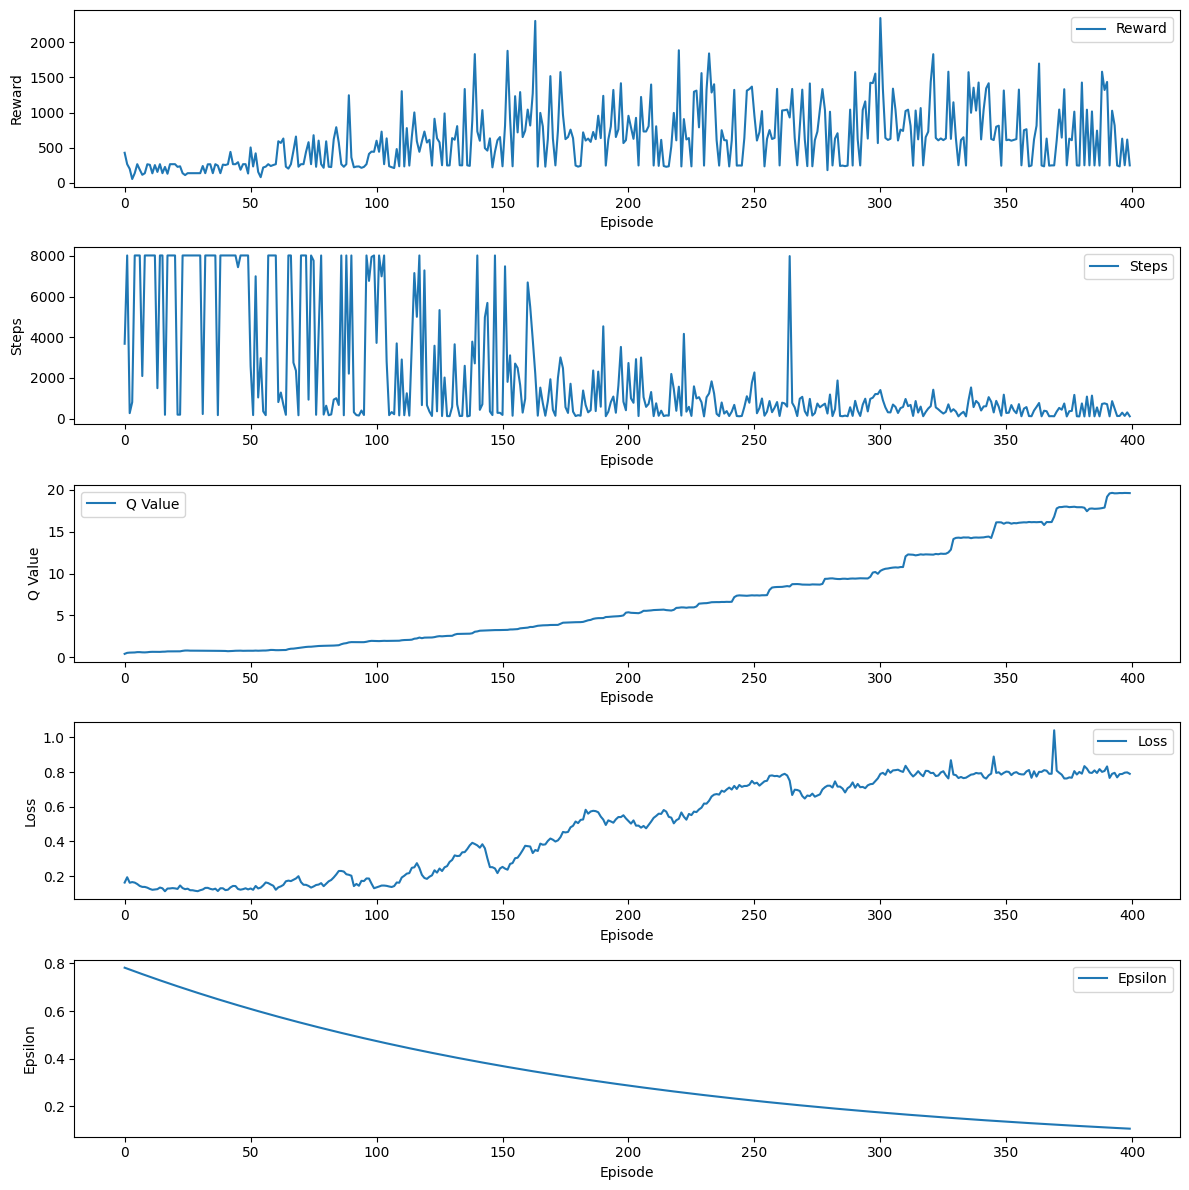

Episode 401 abgeschlossen mit 680 Schritten, Gesamtbelohnung: 1341.0, Epsilon: 0.10533270926593409


Episode 402 abgeschlossen mit 122 Schritten, Gesamtbelohnung: 251.0, Epsilon: 0.10480604571960442


Episode 403 abgeschlossen mit 126 Schritten, Gesamtbelohnung: 249.0, Epsilon: 0.1042820154910064


Episode 404 abgeschlossen mit 820 Schritten, Gesamtbelohnung: 1685.0, Epsilon: 0.10376060541355137


Episode 405 abgeschlossen mit 118 Schritten, Gesamtbelohnung: 248.0, Epsilon: 0.1032418023864836


Episode 406 abgeschlossen mit 4058 Schritten, Gesamtbelohnung: 929.0, Epsilon: 0.10272559337455119


Episode 407 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 249.0, Epsilon: 0.10221196540767843


Episode 408 abgeschlossen mit 130 Schritten, Gesamtbelohnung: 249.0, Epsilon: 0.10170090558064004


Episode 409 abgeschlossen mit 324 Schritten, Gesamtbelohnung: 636.0, Epsilon: 0.10119240105273684


Episode 410 abgeschlossen mit 702 Schritten, Gesamtbelohnung: 715.0, Epsilon: 0.10068643904747315



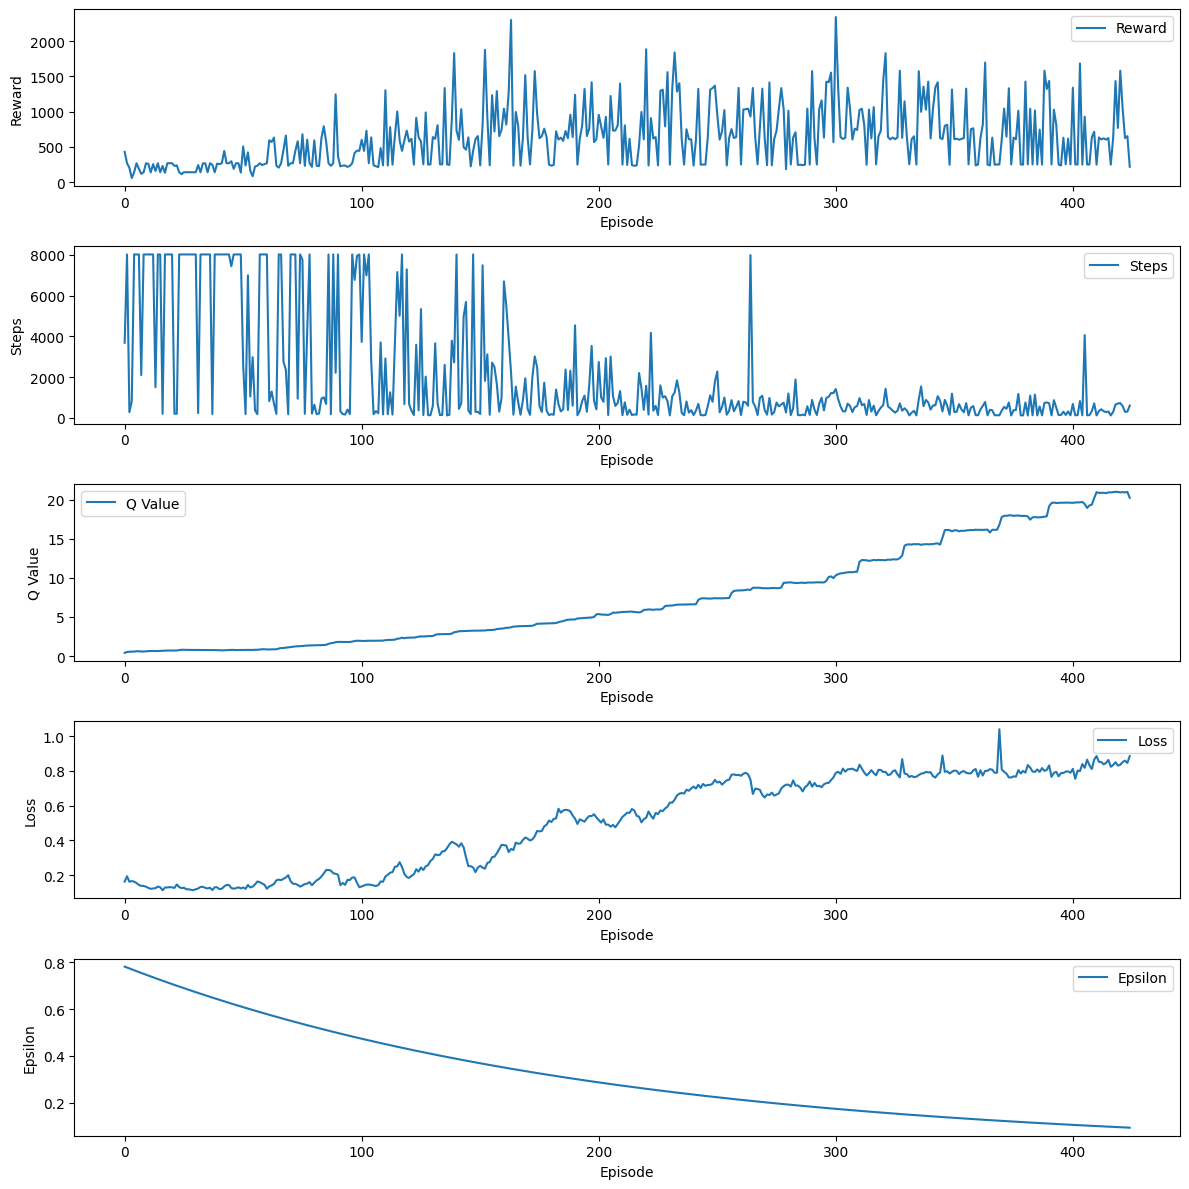

Episode 426 abgeschlossen mit 266 Schritten, Gesamtbelohnung: 624.0, Epsilon: 0.09292664835904782


Episode 427 abgeschlossen mit 465 Schritten, Gesamtbelohnung: 1051.0, Epsilon: 0.09246201511725258


Episode 428 abgeschlossen mit 1246 Schritten, Gesamtbelohnung: 1840.0, Epsilon: 0.09199970504166631


Episode 429 abgeschlossen mit 607 Schritten, Gesamtbelohnung: 1330.0, Epsilon: 0.09153970651645797


Episode 430 abgeschlossen mit 140 Schritten, Gesamtbelohnung: 233.0, Epsilon: 0.09108200798387568


Episode 431 abgeschlossen mit 674 Schritten, Gesamtbelohnung: 1435.0, Epsilon: 0.0906265979439563


Episode 432 abgeschlossen mit 687 Schritten, Gesamtbelohnung: 1039.0, Epsilon: 0.09017346495423652


Episode 433 abgeschlossen mit 122 Schritten, Gesamtbelohnung: 252.0, Epsilon: 0.08972259762946533


Episode 434 abgeschlossen mit 745 Schritten, Gesamtbelohnung: 1341.0, Epsilon: 0.089273984641318


Episode 435 abgeschlossen mit 770 Schritten, Gesamtbelohnung: 1691.0, Epsilon: 0.088827614718111

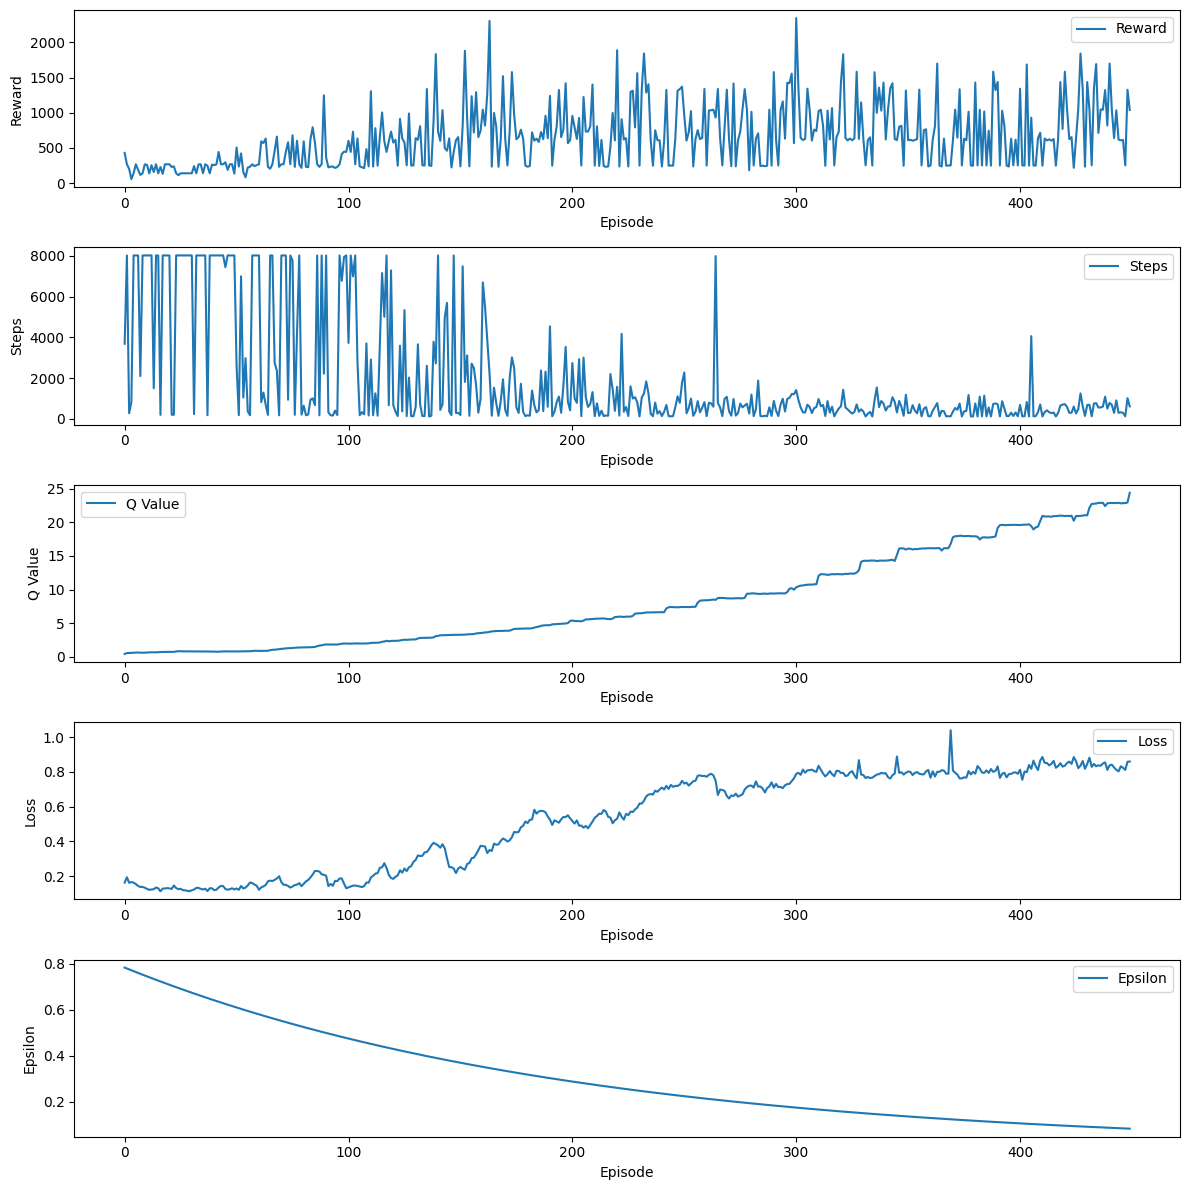

Episode 451 abgeschlossen mit 354 Schritten, Gesamtbelohnung: 650.0, Epsilon: 0.08198177029173696


Episode 452 abgeschlossen mit 827 Schritten, Gesamtbelohnung: 1033.0, Epsilon: 0.08157186144027828


Episode 453 abgeschlossen mit 358 Schritten, Gesamtbelohnung: 626.0, Epsilon: 0.0811640021330769


Episode 454 abgeschlossen mit 136 Schritten, Gesamtbelohnung: 234.0, Epsilon: 0.08075818212241151


Episode 455 abgeschlossen mit 922 Schritten, Gesamtbelohnung: 1428.0, Epsilon: 0.08035439121179945


Episode 456 abgeschlossen mit 638 Schritten, Gesamtbelohnung: 620.0, Epsilon: 0.07995261925574046


Episode 457 abgeschlossen mit 852 Schritten, Gesamtbelohnung: 1030.0, Epsilon: 0.07955285615946175


Episode 458 abgeschlossen mit 122 Schritten, Gesamtbelohnung: 249.0, Epsilon: 0.07915509187866444


Episode 459 abgeschlossen mit 560 Schritten, Gesamtbelohnung: 756.0, Epsilon: 0.07875931641927113


Episode 460 abgeschlossen mit 916 Schritten, Gesamtbelohnung: 538.0, Epsilon: 0.07836551983717477


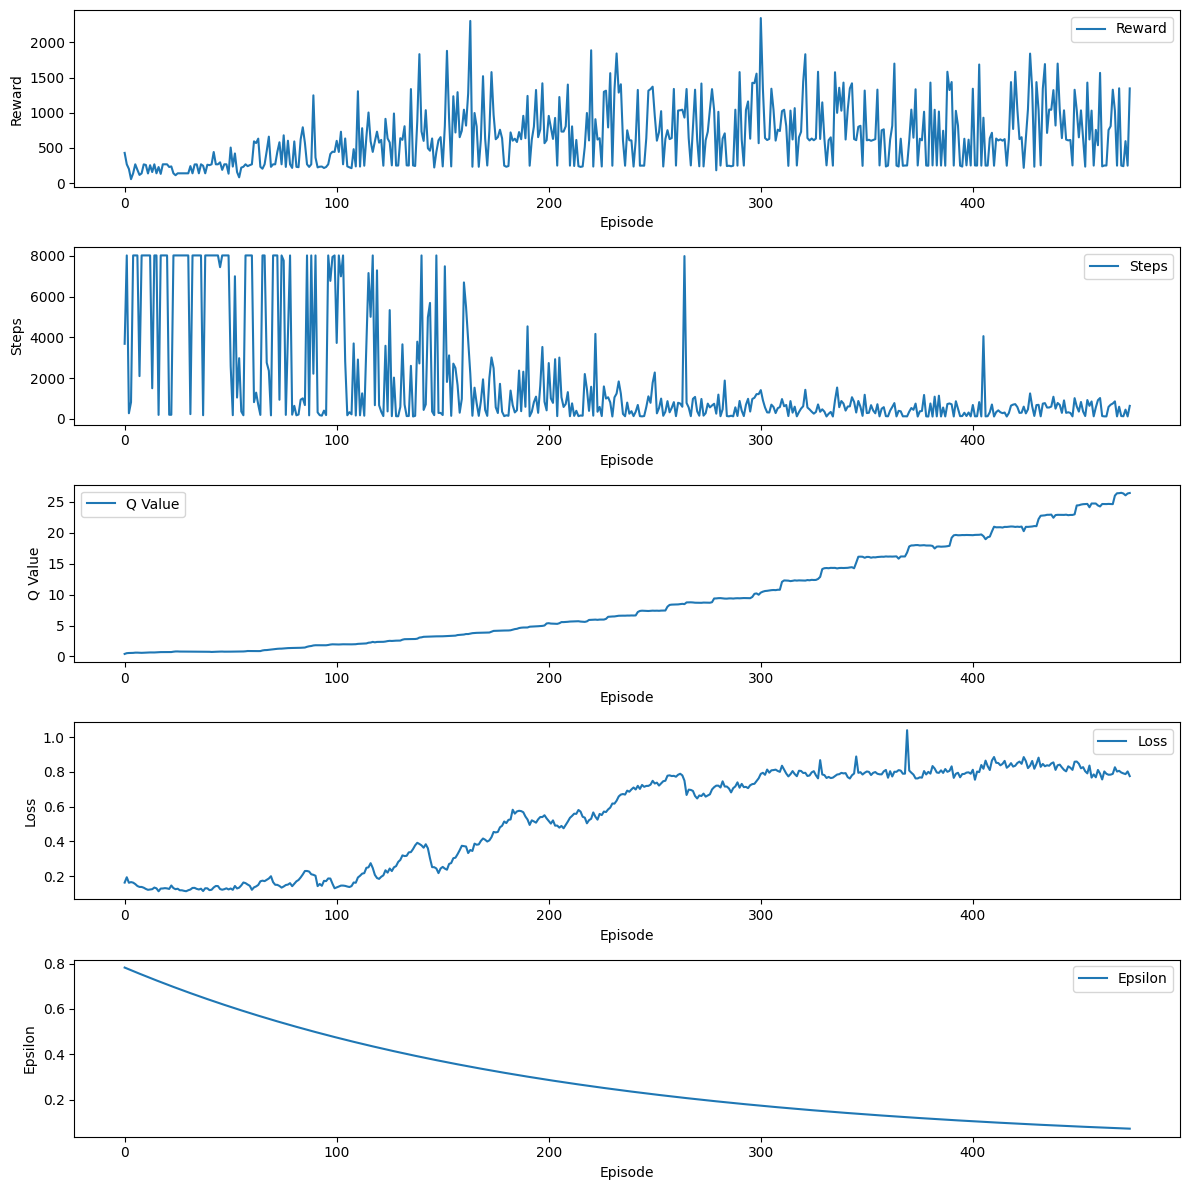

Episode 476 abgeschlossen mit 132 Schritten, Gesamtbelohnung: 238.0, Epsilon: 0.07232597730414898


Episode 477 abgeschlossen mit 458 Schritten, Gesamtbelohnung: 220.0, Epsilon: 0.07196434741762824


Episode 478 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 249.0, Epsilon: 0.0716045256805401


Episode 479 abgeschlossen mit 644 Schritten, Gesamtbelohnung: 1041.0, Epsilon: 0.0712465030521374


Episode 480 abgeschlossen mit 114 Schritten, Gesamtbelohnung: 248.0, Epsilon: 0.0708902705368767


Episode 481 abgeschlossen mit 268 Schritten, Gesamtbelohnung: 620.0, Epsilon: 0.07053581918419231


Episode 482 abgeschlossen mit 150 Schritten, Gesamtbelohnung: 239.0, Epsilon: 0.07018314008827135


Episode 483 abgeschlossen mit 800 Schritten, Gesamtbelohnung: 1577.0, Epsilon: 0.06983222438783


Episode 484 abgeschlossen mit 286 Schritten, Gesamtbelohnung: 633.0, Epsilon: 0.06948306326589085


Episode 485 abgeschlossen mit 827 Schritten, Gesamtbelohnung: 1328.0, Epsilon: 0.0691356479495614


Epis

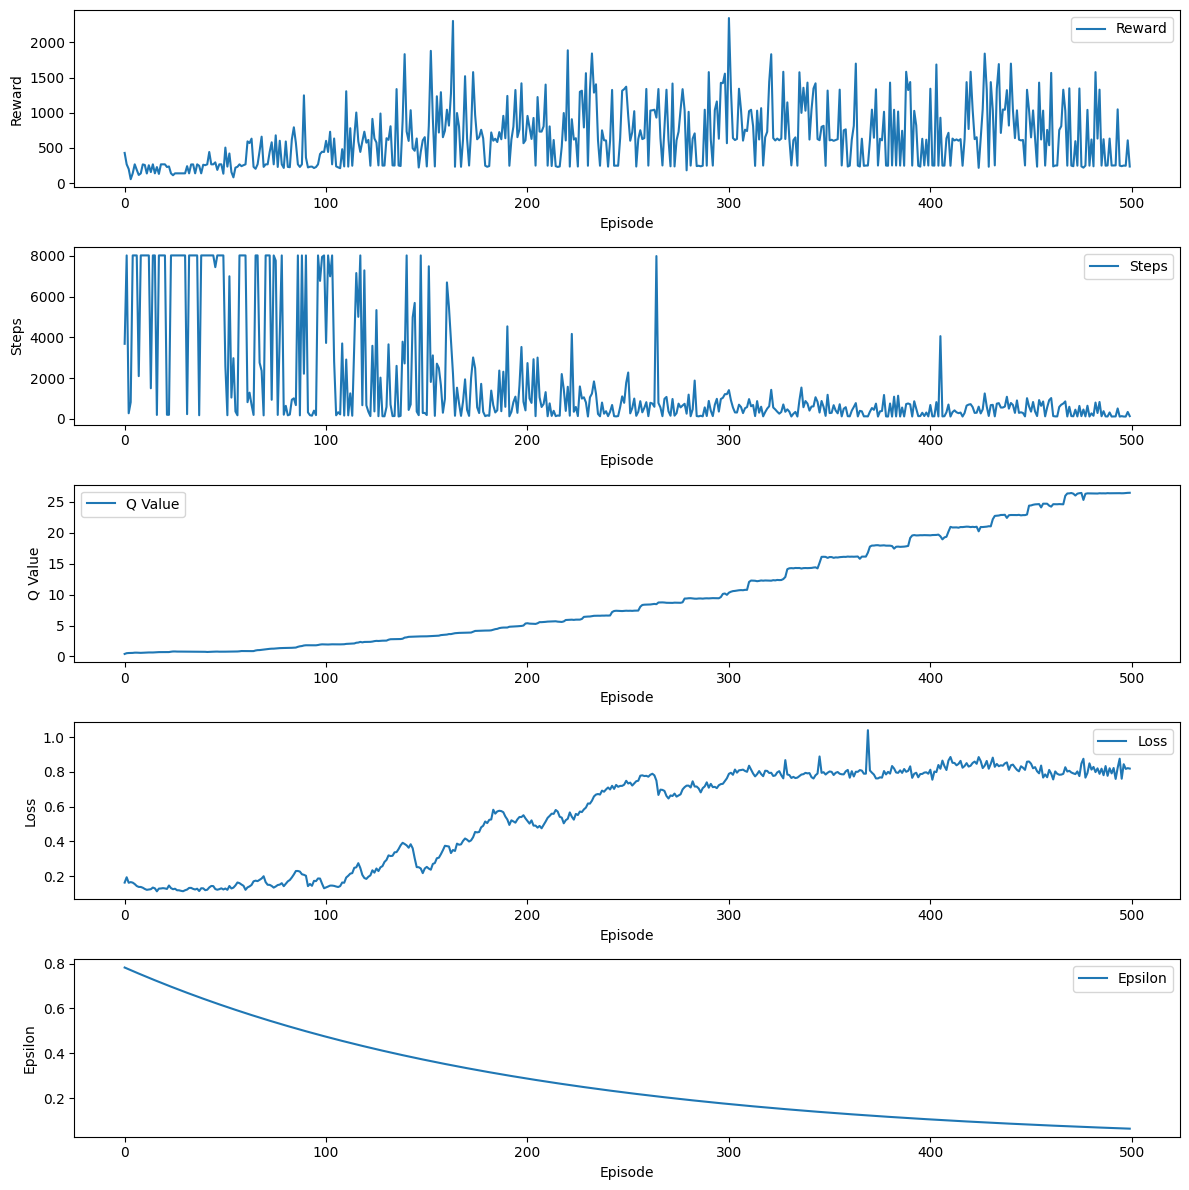

Episode 501 abgeschlossen mit 450 Schritten, Gesamtbelohnung: 627.0, Epsilon: 0.06380744126877576


Episode 502 abgeschlossen mit 318 Schritten, Gesamtbelohnung: 627.0, Epsilon: 0.06348840406243188


Episode 503 abgeschlossen mit 630 Schritten, Gesamtbelohnung: 1427.0, Epsilon: 0.06317096204211972


Episode 504 abgeschlossen mit 150 Schritten, Gesamtbelohnung: 238.0, Epsilon: 0.06285510723190912


Episode 505 abgeschlossen mit 114 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.06254083169574957


Episode 506 abgeschlossen mit 735 Schritten, Gesamtbelohnung: 1037.0, Epsilon: 0.062228127537270826


Episode 507 abgeschlossen mit 672 Schritten, Gesamtbelohnung: 1039.0, Epsilon: 0.06191698689958447


Episode 508 abgeschlossen mit 146 Schritten, Gesamtbelohnung: 238.0, Epsilon: 0.061607401965086545


Episode 509 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 248.0, Epsilon: 0.06129936495526111


Episode 510 abgeschlossen mit 722 Schritten, Gesamtbelohnung: 1339.0, Epsilon: 0.06099286813048

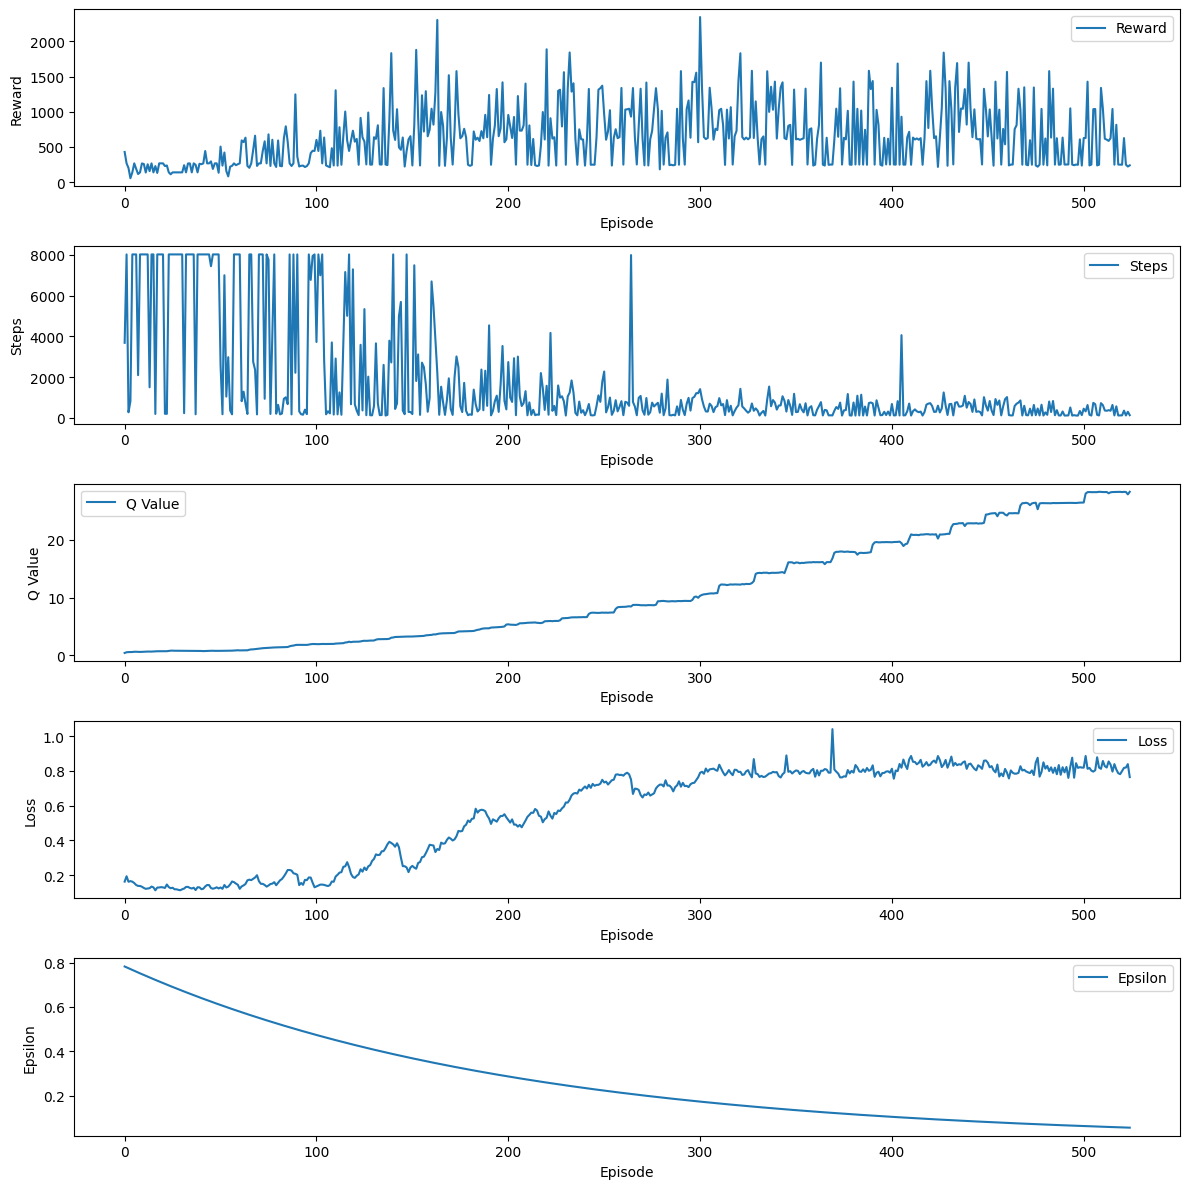

Episode 526 abgeschlossen mit 496 Schritten, Gesamtbelohnung: 1069.0, Epsilon: 0.056292216338080694


Episode 527 abgeschlossen mit 993 Schritten, Gesamtbelohnung: 1326.0, Epsilon: 0.05601075525639029


Episode 528 abgeschlossen mit 138 Schritten, Gesamtbelohnung: 240.0, Epsilon: 0.05573070148010834


Episode 529 abgeschlossen mit 707 Schritten, Gesamtbelohnung: 1340.0, Epsilon: 0.0554520479727078


Episode 530 abgeschlossen mit 116 Schritten, Gesamtbelohnung: 251.0, Epsilon: 0.05517478773284426


Episode 531 abgeschlossen mit 298 Schritten, Gesamtbelohnung: 633.0, Epsilon: 0.05489891379418004


Episode 532 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.05462441922520914


Episode 533 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 249.0, Epsilon: 0.0543512971290831


Episode 534 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.05407954064343768


Episode 535 abgeschlossen mit 152 Schritten, Gesamtbelohnung: 238.0, Epsilon: 0.05380914294022049


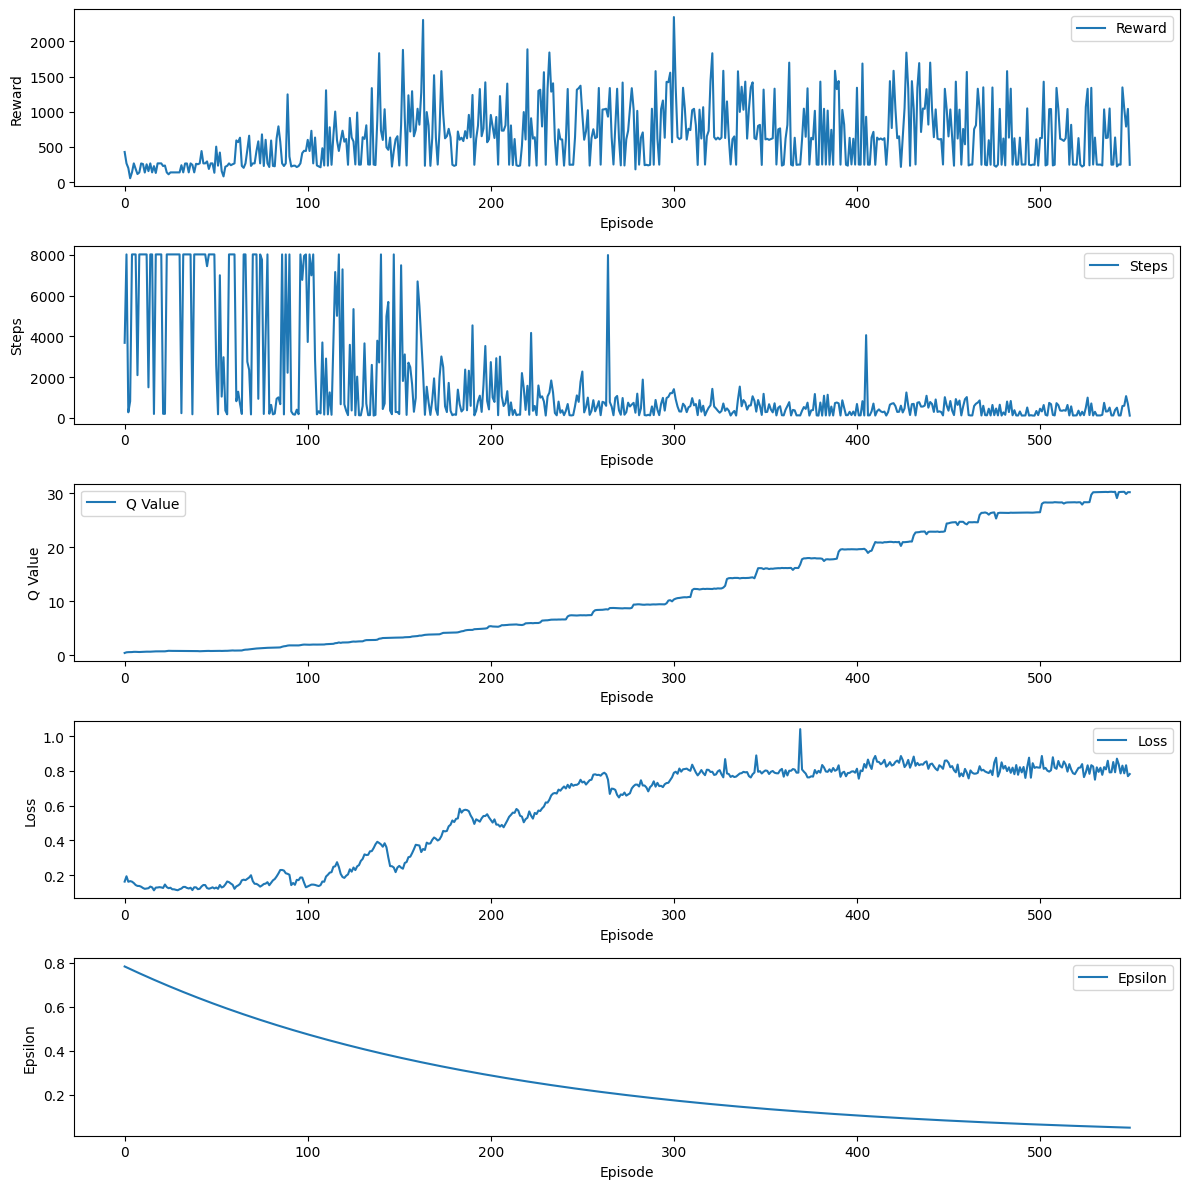

Episode 551 abgeschlossen mit 160 Schritten, Gesamtbelohnung: 231.0, Epsilon: 0.04966213277390804


Episode 552 abgeschlossen mit 152 Schritten, Gesamtbelohnung: 240.0, Epsilon: 0.0494138221100385


Episode 553 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.04916675299948831


Episode 554 abgeschlossen mit 356 Schritten, Gesamtbelohnung: 639.0, Epsilon: 0.04892091923449087


Episode 555 abgeschlossen mit 284 Schritten, Gesamtbelohnung: 631.0, Epsilon: 0.04867631463831842


Episode 556 abgeschlossen mit 1100 Schritten, Gesamtbelohnung: 1321.0, Epsilon: 0.048432933065126825


Episode 557 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 249.0, Epsilon: 0.048190768399801194


Episode 558 abgeschlossen mit 414 Schritten, Gesamtbelohnung: 630.0, Epsilon: 0.04794981455780219


Episode 559 abgeschlossen mit 926 Schritten, Gesamtbelohnung: 733.0, Epsilon: 0.04771006548501318


Episode 560 abgeschlossen mit 991 Schritten, Gesamtbelohnung: 1023.0, Epsilon: 0.0474715151575881

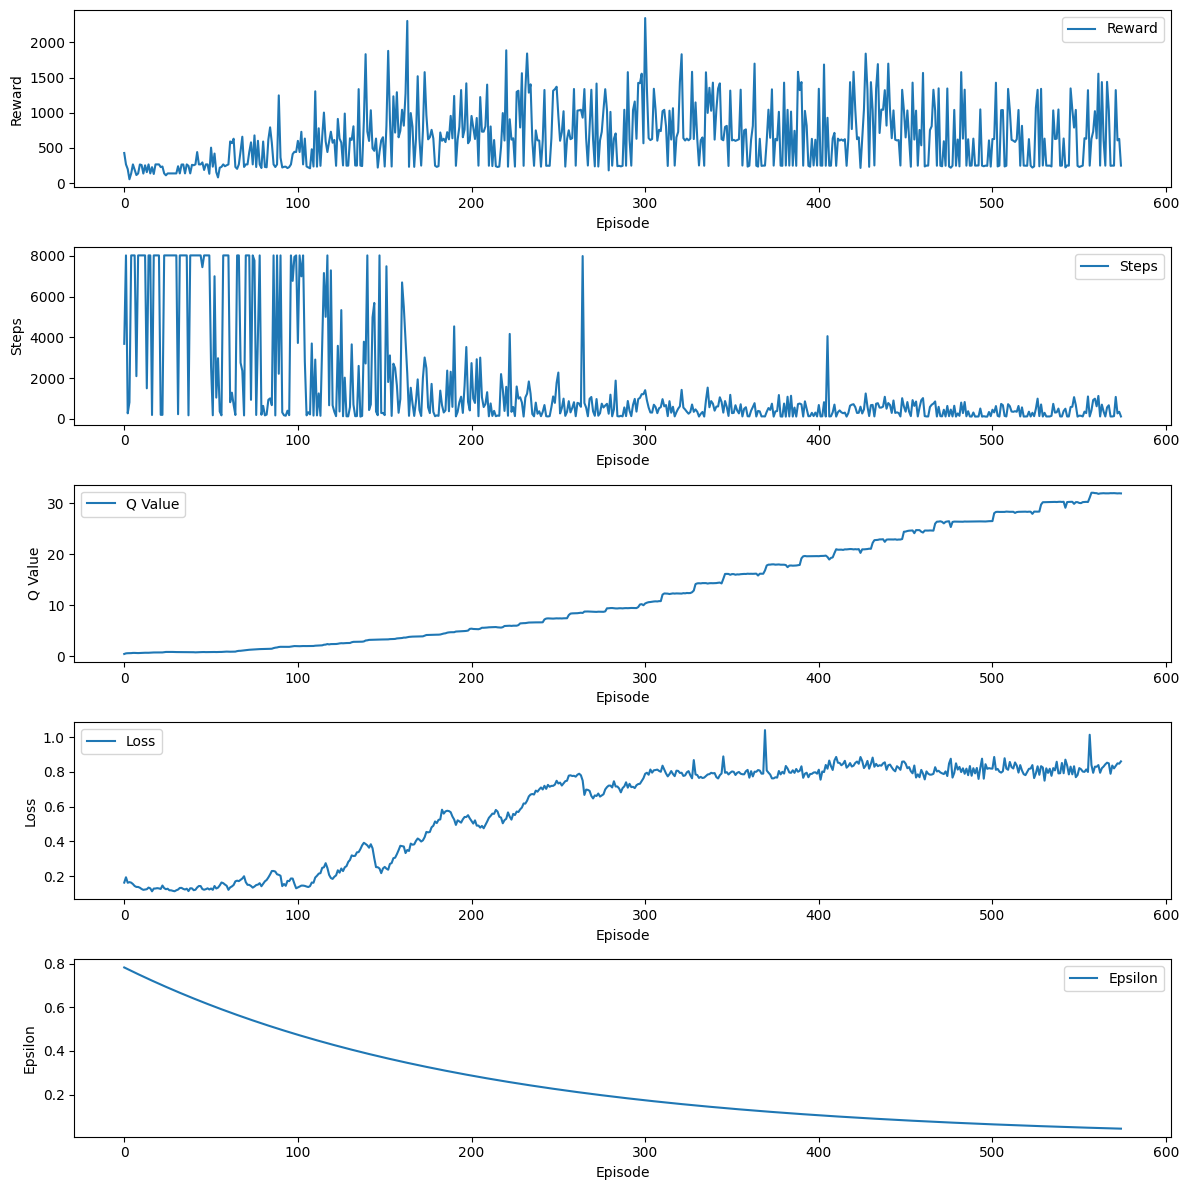

Episode 576 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 249.0, Epsilon: 0.043812938841152796


Episode 577 abgeschlossen mit 114 Schritten, Gesamtbelohnung: 247.0, Epsilon: 0.04359387414694703


Episode 578 abgeschlossen mit 302 Schritten, Gesamtbelohnung: 600.0, Epsilon: 0.043375904776212296


Episode 579 abgeschlossen mit 114 Schritten, Gesamtbelohnung: 248.0, Epsilon: 0.043159025252331236


Episode 580 abgeschlossen mit 114 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.04294323012606958


Episode 581 abgeschlossen mit 366 Schritten, Gesamtbelohnung: 634.0, Epsilon: 0.04272851397543923


Episode 582 abgeschlossen mit 728 Schritten, Gesamtbelohnung: 807.0, Epsilon: 0.04251487140556204


Episode 583 abgeschlossen mit 380 Schritten, Gesamtbelohnung: 622.0, Epsilon: 0.04230229704853423


Episode 584 abgeschlossen mit 114 Schritten, Gesamtbelohnung: 251.0, Epsilon: 0.04209078556329156


Episode 585 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.0418803316354751


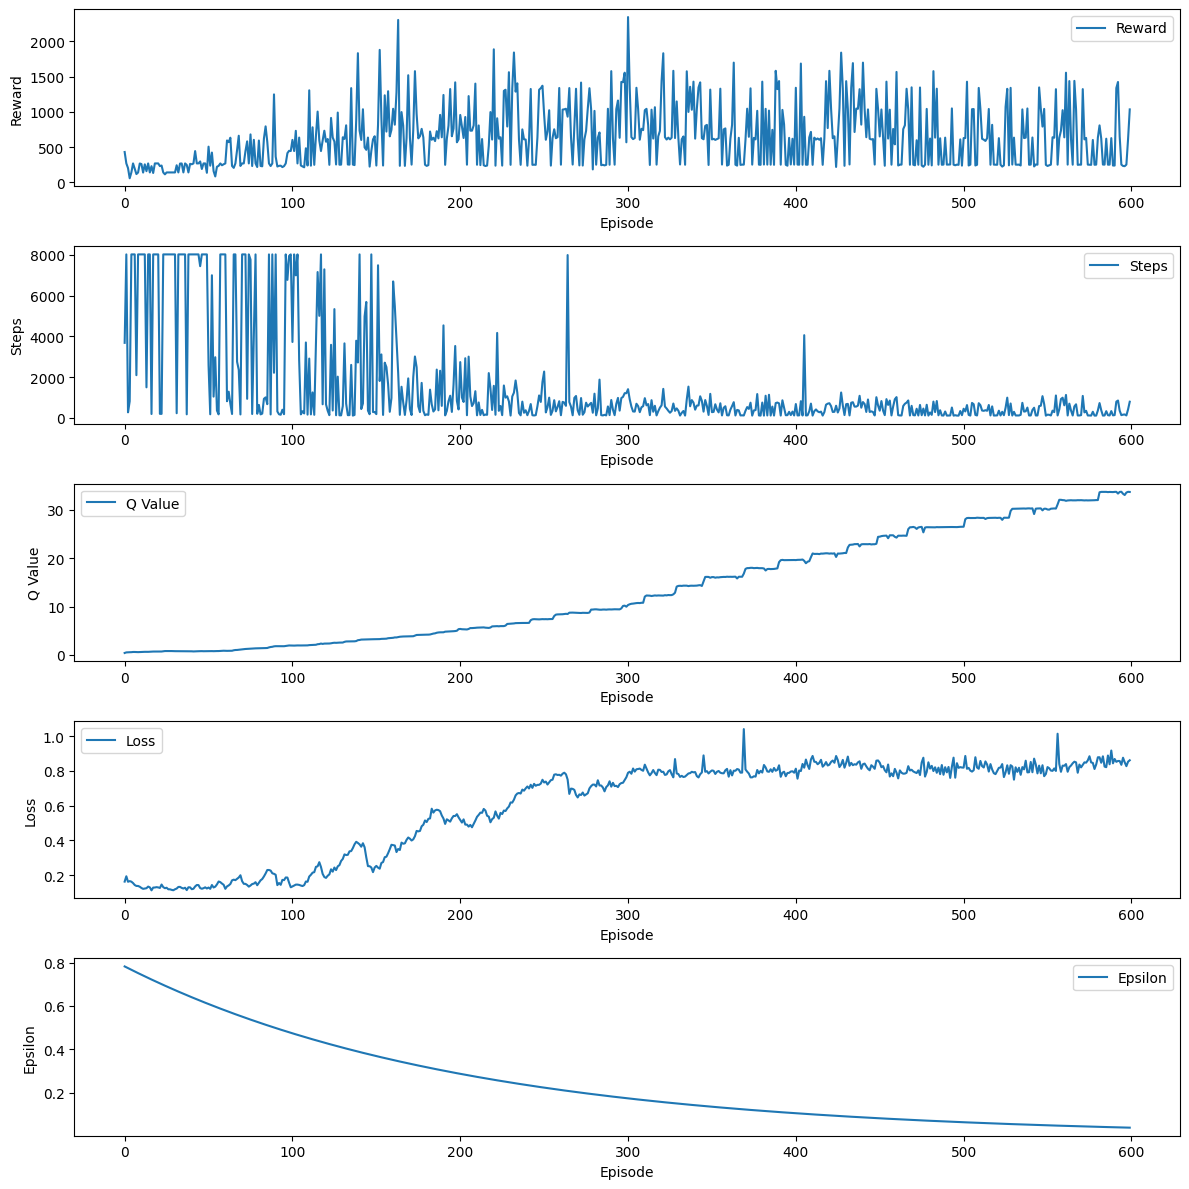

Episode 601 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.0386526615487428


Episode 602 abgeschlossen mit 444 Schritten, Gesamtbelohnung: 602.0, Epsilon: 0.03845939824099909


Episode 603 abgeschlossen mit 671 Schritten, Gesamtbelohnung: 1039.0, Epsilon: 0.03826710124979409


Episode 604 abgeschlossen mit 112 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.038075765743545126


Episode 605 abgeschlossen mit 398 Schritten, Gesamtbelohnung: 624.0, Epsilon: 0.0378853869148274


Episode 606 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 251.0, Epsilon: 0.03769595998025326


Episode 607 abgeschlossen mit 276 Schritten, Gesamtbelohnung: 627.0, Epsilon: 0.03750748018035199


Episode 608 abgeschlossen mit 358 Schritten, Gesamtbelohnung: 623.0, Epsilon: 0.037319942779450235


Episode 609 abgeschlossen mit 626 Schritten, Gesamtbelohnung: 636.0, Epsilon: 0.037133343065552986


Episode 610 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.03694767635022522


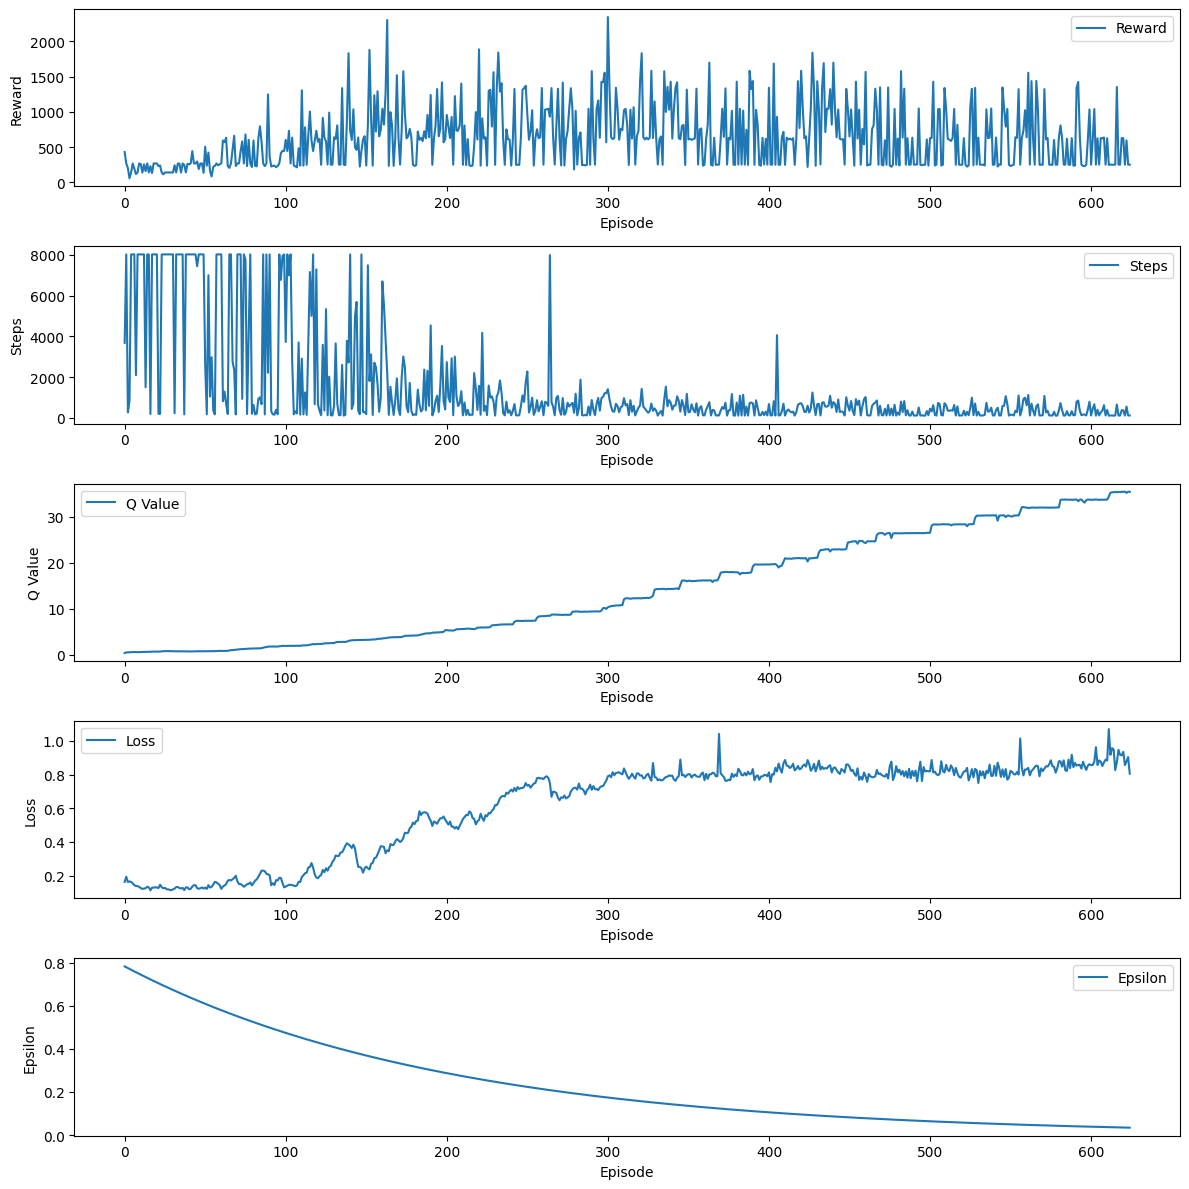

Episode 626 abgeschlossen mit 134 Schritten, Gesamtbelohnung: 249.0, Epsilon: 0.034100160462149656


Episode 627 abgeschlossen mit 484 Schritten, Gesamtbelohnung: 615.0, Epsilon: 0.03392965965983891


Episode 628 abgeschlossen mit 122 Schritten, Gesamtbelohnung: 248.0, Epsilon: 0.033760011361539714


Episode 629 abgeschlossen mit 396 Schritten, Gesamtbelohnung: 744.0, Epsilon: 0.03359121130473201


Episode 630 abgeschlossen mit 370 Schritten, Gesamtbelohnung: 633.0, Epsilon: 0.033423255248208356


Episode 631 abgeschlossen mit 638 Schritten, Gesamtbelohnung: 1043.0, Epsilon: 0.03325613897196732


Episode 632 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 247.0, Epsilon: 0.03308985827710748


Episode 633 abgeschlossen mit 114 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.032924408985721944


Episode 634 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.03275978694079333


Episode 635 abgeschlossen mit 336 Schritten, Gesamtbelohnung: 637.0, Epsilon: 0.032595988006089

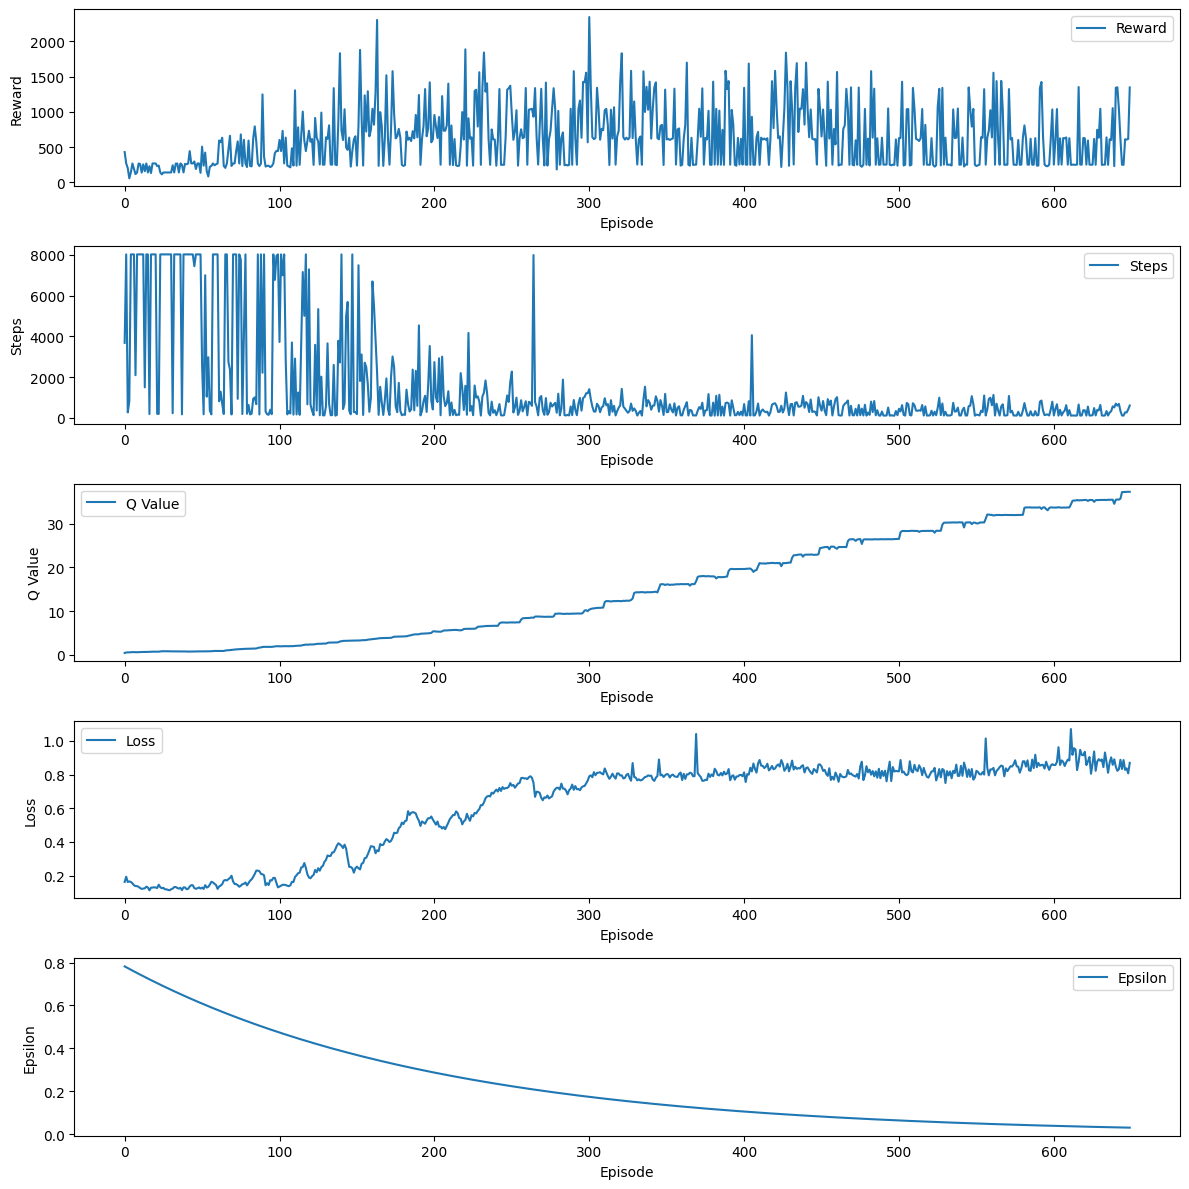

Episode 651 abgeschlossen mit 390 Schritten, Gesamtbelohnung: 620.0, Epsilon: 0.030083851847510768


Episode 652 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 247.0, Epsilon: 0.029933432588273214


Episode 653 abgeschlossen mit 892 Schritten, Gesamtbelohnung: 1421.0, Epsilon: 0.029783765425331846


Episode 654 abgeschlossen mit 614 Schritten, Gesamtbelohnung: 637.0, Epsilon: 0.029634846598205186


Episode 655 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.02948667236521416


Episode 656 abgeschlossen mit 280 Schritten, Gesamtbelohnung: 632.0, Epsilon: 0.029339239003388088


Episode 657 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.029192542808371146


Episode 658 abgeschlossen mit 118 Schritten, Gesamtbelohnung: 251.0, Epsilon: 0.02904658009432929


Episode 659 abgeschlossen mit 796 Schritten, Gesamtbelohnung: 804.0, Epsilon: 0.028901347193857643


Episode 660 abgeschlossen mit 424 Schritten, Gesamtbelohnung: 624.0, Epsilon: 0.028756840457

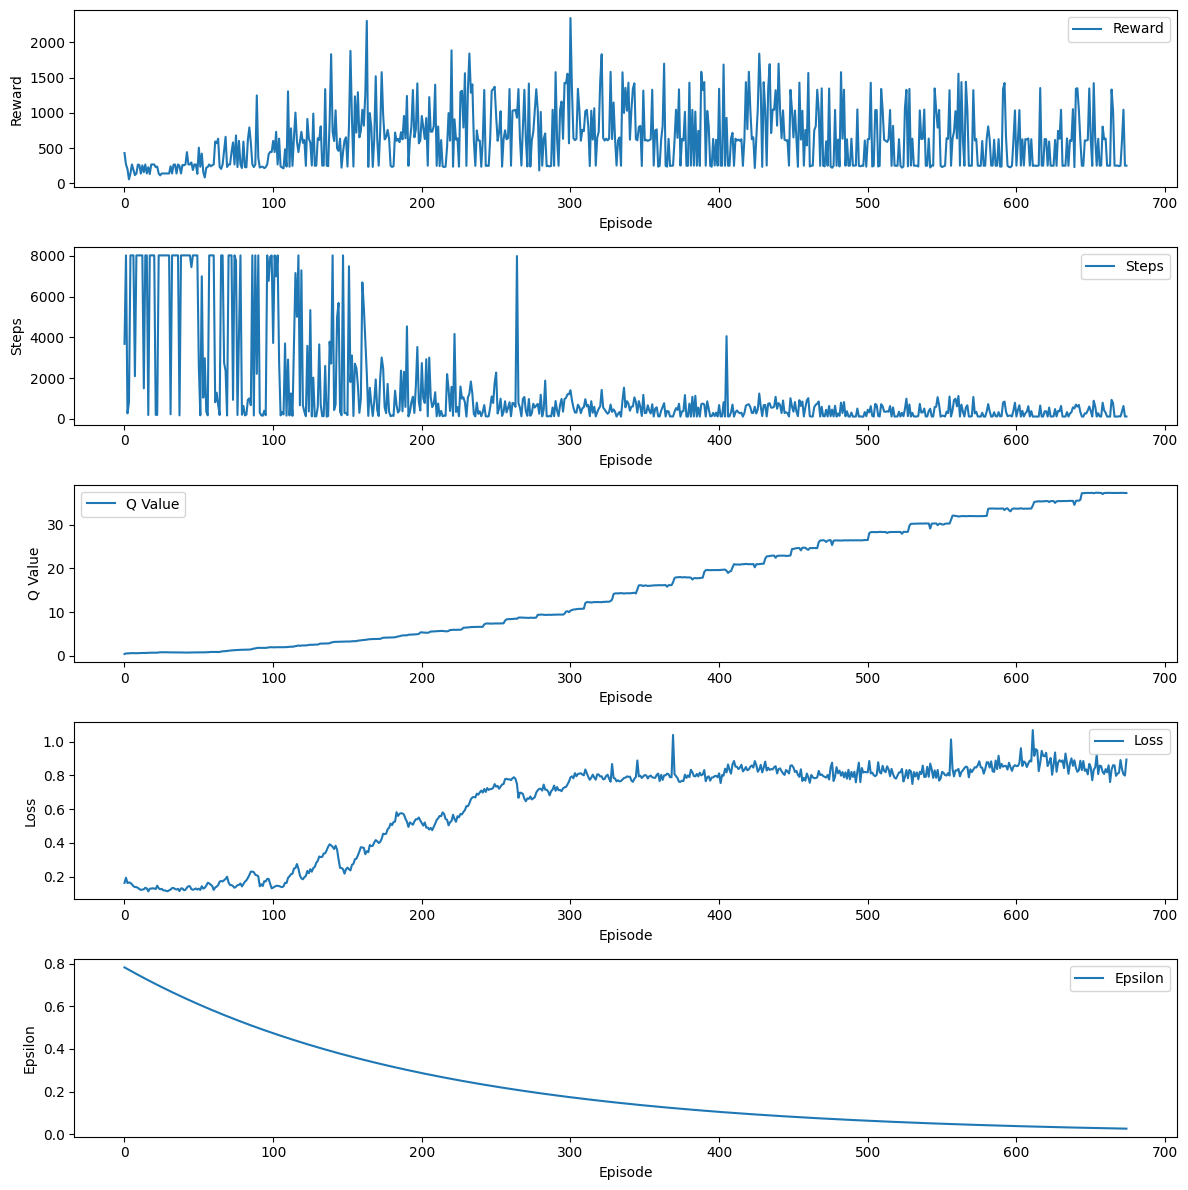

Episode 676 abgeschlossen mit 114 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.02654058308574668


Episode 677 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.026407880170317945


Episode 678 abgeschlossen mit 338 Schritten, Gesamtbelohnung: 606.0, Epsilon: 0.026275840769466357


Episode 679 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.026144461565619025


Episode 680 abgeschlossen mit 298 Schritten, Gesamtbelohnung: 607.0, Epsilon: 0.02601373925779093


Episode 681 abgeschlossen mit 500 Schritten, Gesamtbelohnung: 1047.0, Epsilon: 0.025883670561501974


Episode 682 abgeschlossen mit 1186 Schritten, Gesamtbelohnung: 1013.0, Epsilon: 0.025754252208694463


Episode 683 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.02562548094765099


Episode 684 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.025497353542912736


Episode 685 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 249.0, Epsilon: 0.02536986677

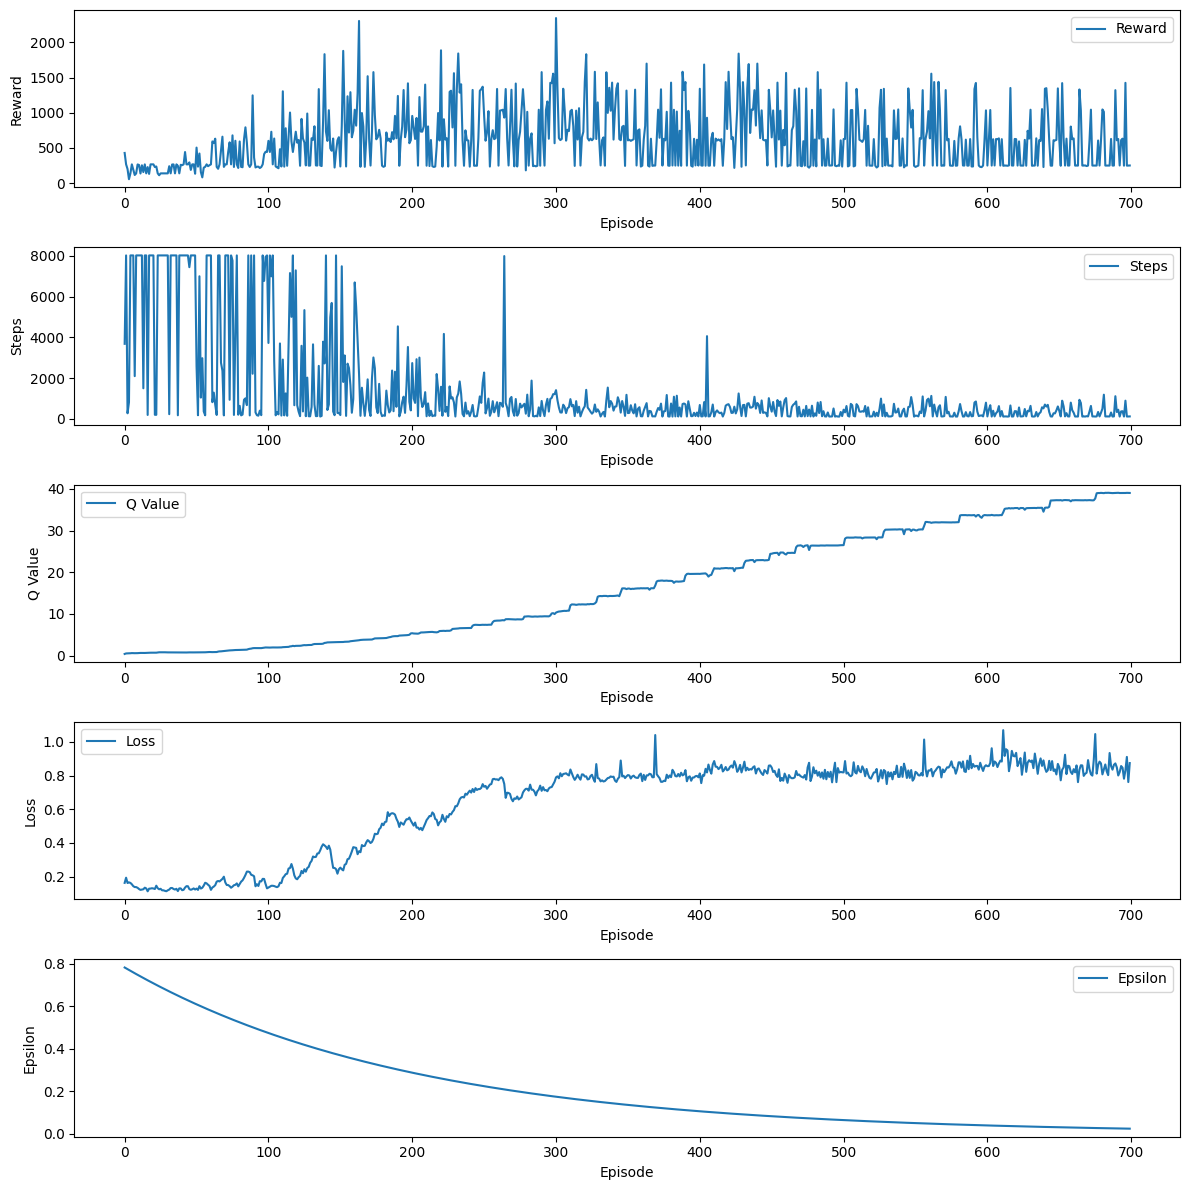

Episode 701 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.023414639657910272


Episode 702 abgeschlossen mit 118 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.023297566459620722


Episode 703 abgeschlossen mit 134 Schritten, Gesamtbelohnung: 238.0, Epsilon: 0.023181078627322618


Episode 704 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.023065173234186005


Episode 705 abgeschlossen mit 390 Schritten, Gesamtbelohnung: 648.0, Epsilon: 0.022949847368015076


Episode 706 abgeschlossen mit 765 Schritten, Gesamtbelohnung: 1035.0, Epsilon: 0.022835098131175


Episode 707 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.022720922640519125


Episode 708 abgeschlossen mit 574 Schritten, Gesamtbelohnung: 639.0, Epsilon: 0.02260731802731653


Episode 709 abgeschlossen mit 112 Schritten, Gesamtbelohnung: 247.0, Epsilon: 0.022494281437179946


Episode 710 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 251.0, Epsilon: 0.02238181002999

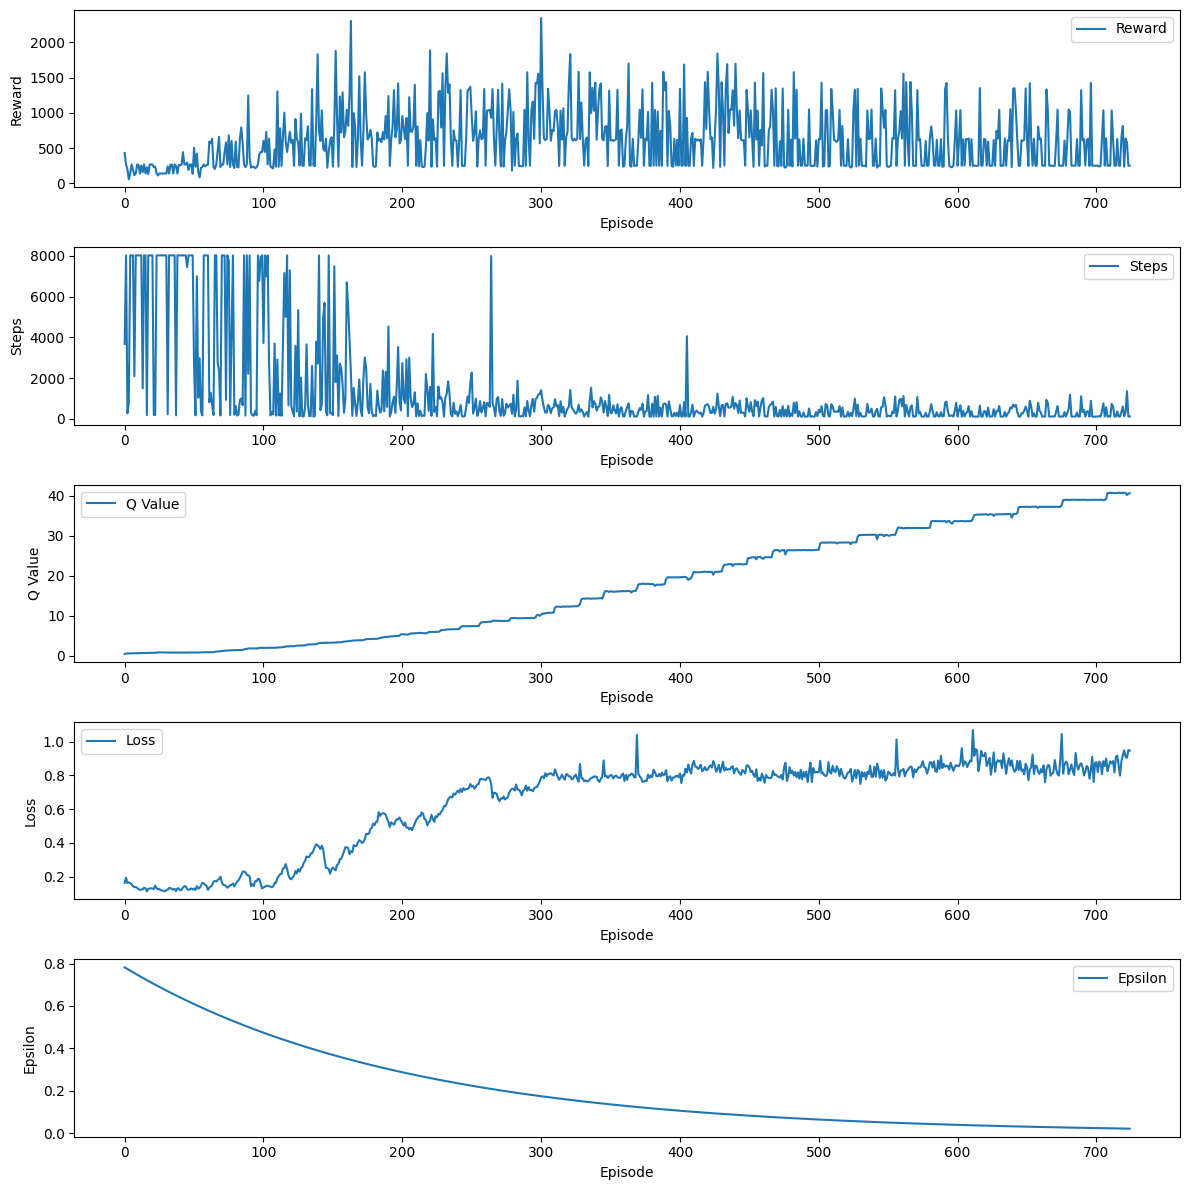

Episode 726 abgeschlossen mit 482 Schritten, Gesamtbelohnung: 738.0, Epsilon: 0.020656869087560238


Episode 727 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.020553584742122436


Episode 728 abgeschlossen mit 782 Schritten, Gesamtbelohnung: 1337.0, Epsilon: 0.020450816818411825


Episode 729 abgeschlossen mit 330 Schritten, Gesamtbelohnung: 651.0, Epsilon: 0.020348562734319765


Episode 730 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.020246819920648168


Episode 731 abgeschlossen mit 408 Schritten, Gesamtbelohnung: 607.0, Epsilon: 0.020145585821044927


Episode 732 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.020044857891939702


Episode 733 abgeschlossen mit 398 Schritten, Gesamtbelohnung: 634.0, Epsilon: 0.019944633602480003


Episode 734 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.019844910434467605


Episode 735 abgeschlossen mit 540 Schritten, Gesamtbelohnung: 617.0, Epsilon: 0.0197456858

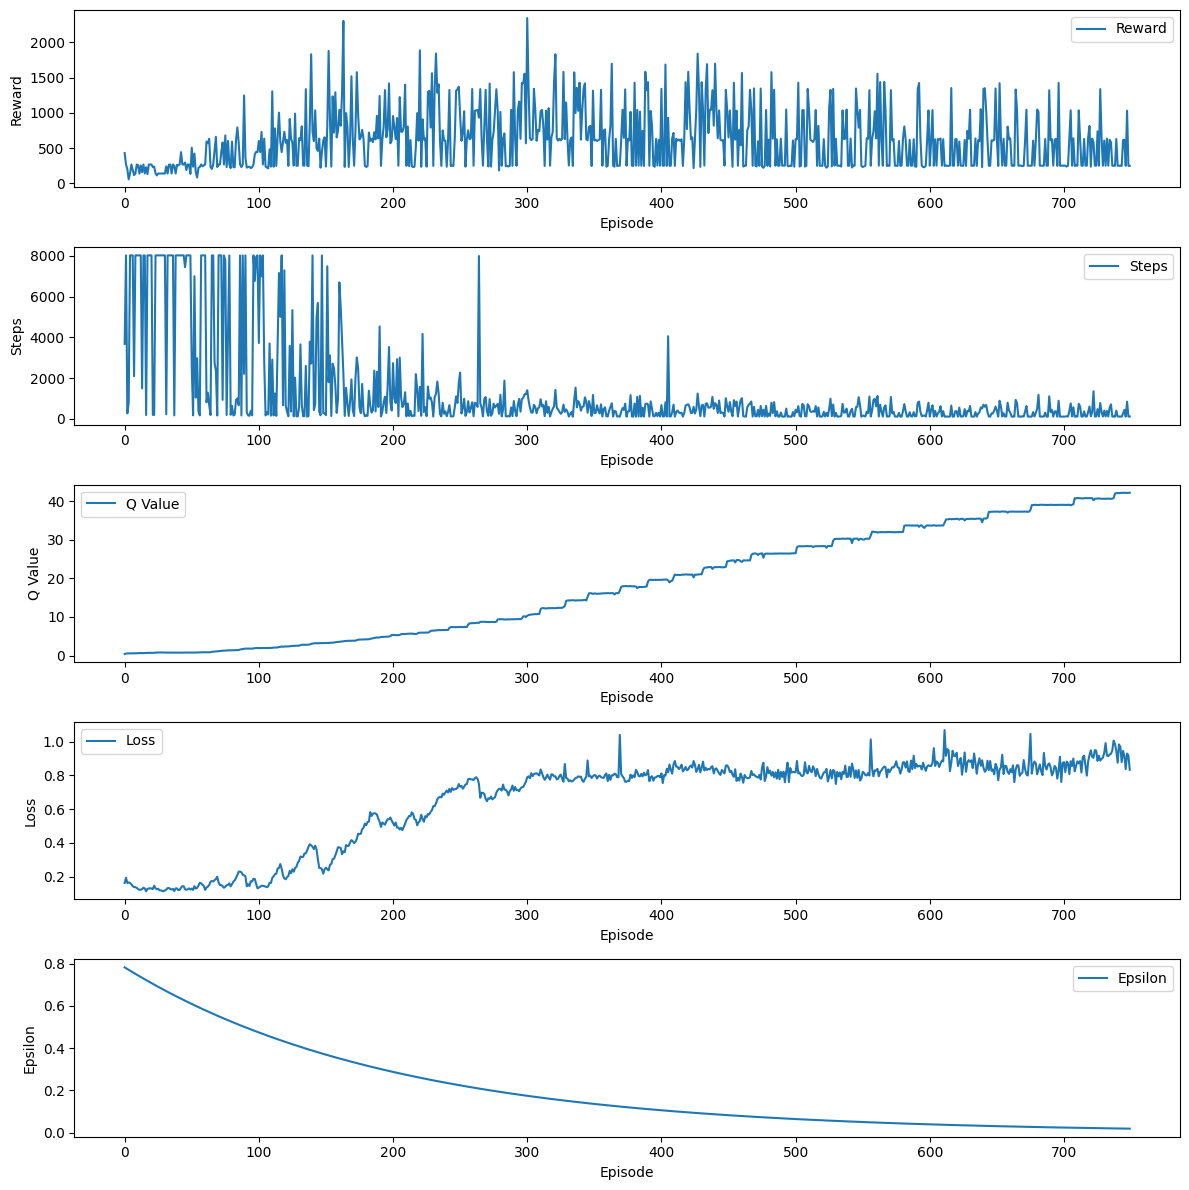

Episode 751 abgeschlossen mit 800 Schritten, Gesamtbelohnung: 759.0, Epsilon: 0.018223908064988973


Episode 752 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.018132788524664028


Episode 753 abgeschlossen mit 890 Schritten, Gesamtbelohnung: 592.0, Epsilon: 0.018042124582040707


Episode 754 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.017951913959130504


Episode 755 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.01786215438933485


Episode 756 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 248.0, Epsilon: 0.017772843617388175


Episode 757 abgeschlossen mit 354 Schritten, Gesamtbelohnung: 620.0, Epsilon: 0.017683979399301233


Episode 758 abgeschlossen mit 704 Schritten, Gesamtbelohnung: 808.0, Epsilon: 0.017595559502304726


Episode 759 abgeschlossen mit 138 Schritten, Gesamtbelohnung: 244.0, Epsilon: 0.0175075817047932


Episode 760 abgeschlossen mit 116 Schritten, Gesamtbelohnung: 251.0, Epsilon: 0.01742004379626

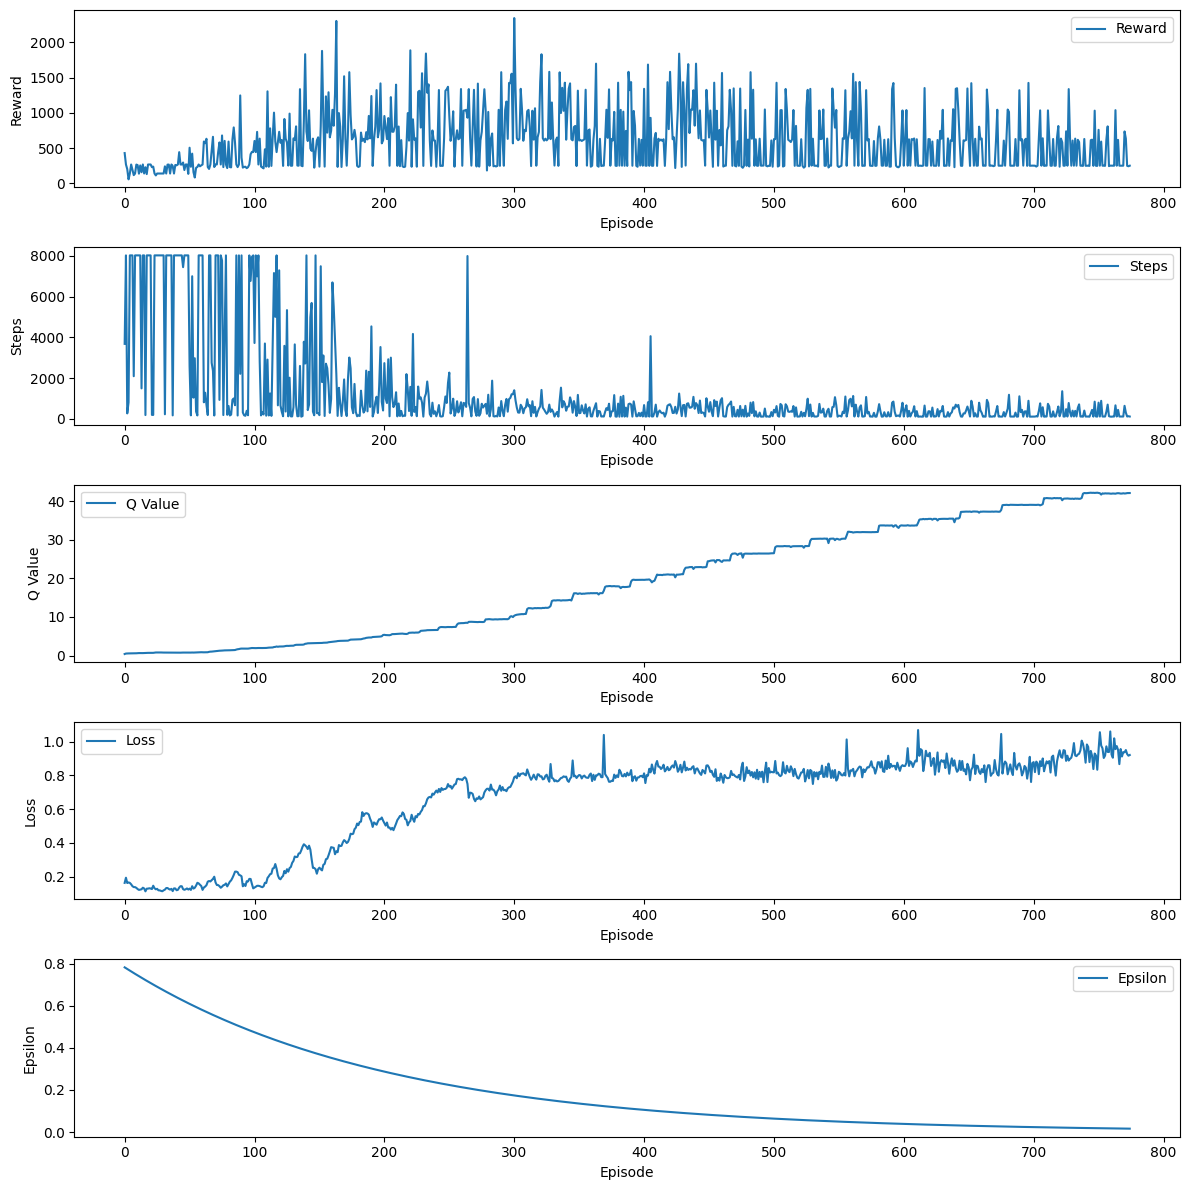

Episode 776 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 249.0, Epsilon: 0.01607750060057119


Episode 777 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.015997113097568336


Episode 778 abgeschlossen mit 278 Schritten, Gesamtbelohnung: 621.0, Epsilon: 0.015917127532080494


Episode 779 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 249.0, Epsilon: 0.01583754189442009


Episode 780 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 252.0, Epsilon: 0.01575835418494799


Episode 781 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.01567956241402325


Episode 782 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.015601164601953134


Episode 783 abgeschlossen mit 316 Schritten, Gesamtbelohnung: 630.0, Epsilon: 0.015523158778943369


Episode 784 abgeschlossen mit 582 Schritten, Gesamtbelohnung: 616.0, Epsilon: 0.015445542985048652


Episode 785 abgeschlossen mit 118 Schritten, Gesamtbelohnung: 251.0, Epsilon: 0.015368315270123

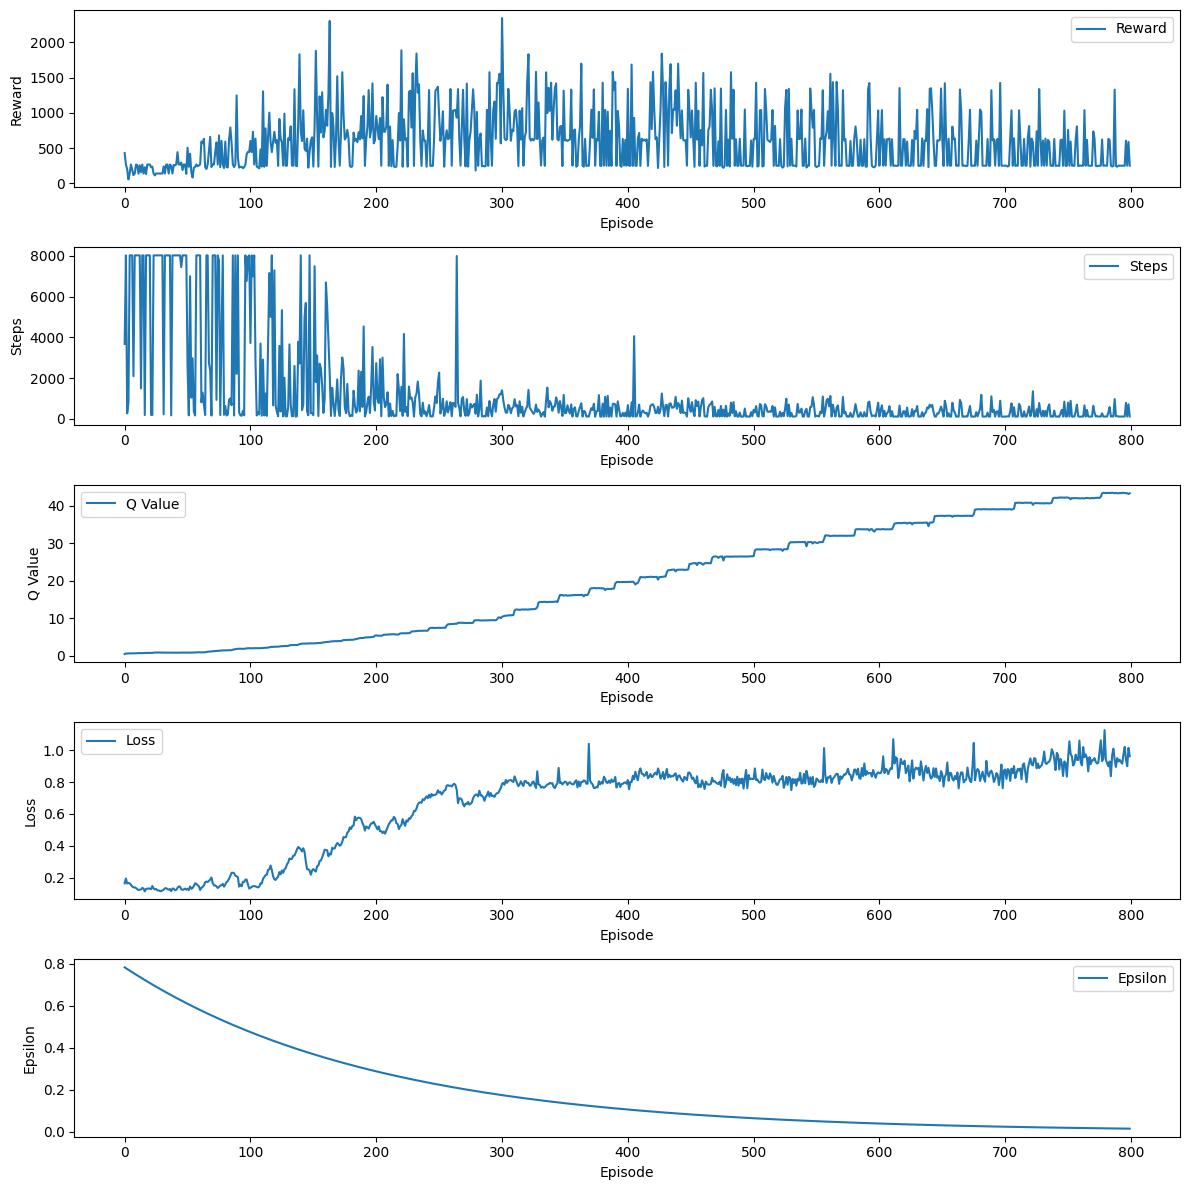

Episode 801 abgeschlossen mit 114 Schritten, Gesamtbelohnung: 252.0, Epsilon: 0.014183896485845416


Episode 802 abgeschlossen mit 733 Schritten, Gesamtbelohnung: 1038.0, Epsilon: 0.014112977003416188


Episode 803 abgeschlossen mit 737 Schritten, Gesamtbelohnung: 1037.0, Epsilon: 0.014042412118399107


Episode 804 abgeschlossen mit 648 Schritten, Gesamtbelohnung: 811.0, Epsilon: 0.013972200057807112


Episode 805 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.013902339057518077


Episode 806 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.013832827362230486


Episode 807 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.013763663225419333


Episode 808 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 247.0, Epsilon: 0.013694844909292236


Episode 809 abgeschlossen mit 624 Schritten, Gesamtbelohnung: 636.0, Epsilon: 0.013626370684745774


Episode 810 abgeschlossen mit 410 Schritten, Gesamtbelohnung: 624.0, Epsilon: 0.013558238

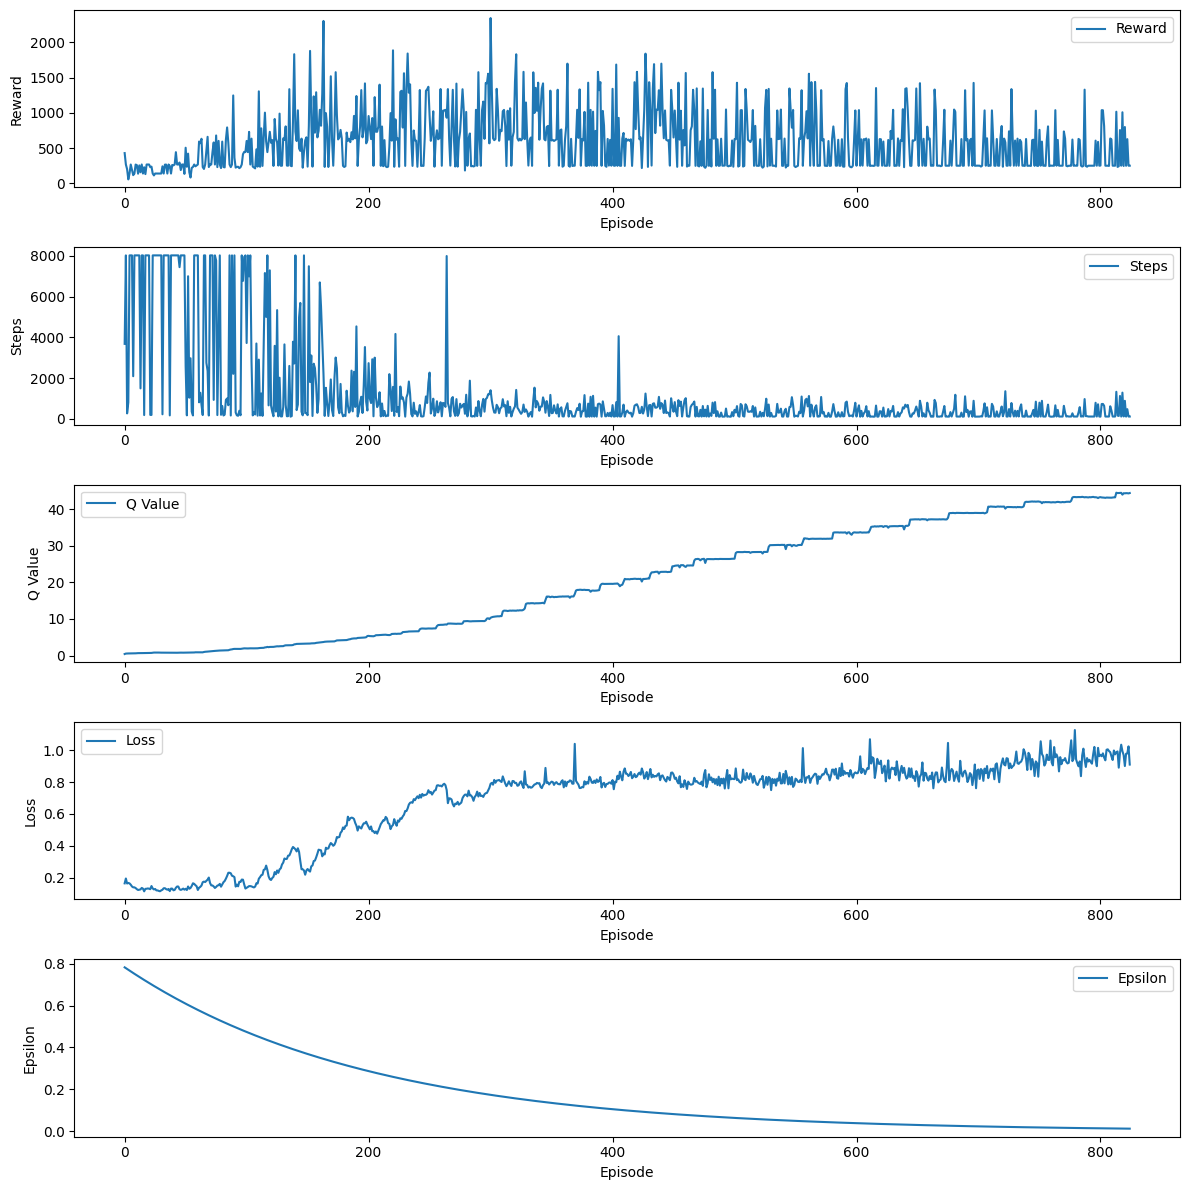

Episode 826 abgeschlossen mit 112 Schritten, Gesamtbelohnung: 249.0, Epsilon: 0.012513320603703188


Episode 827 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.012450754000684672


Episode 828 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.012388500230681249


Episode 829 abgeschlossen mit 520 Schritten, Gesamtbelohnung: 586.0, Epsilon: 0.012326557729527843


Episode 830 abgeschlossen mit 328 Schritten, Gesamtbelohnung: 616.0, Epsilon: 0.012264924940880204


Episode 831 abgeschlossen mit 1932 Schritten, Gesamtbelohnung: 976.0, Epsilon: 0.012203600316175803


Episode 832 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.012142582314594924


Episode 833 abgeschlossen mit 114 Schritten, Gesamtbelohnung: 252.0, Epsilon: 0.01208186940302195


Episode 834 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.01202146005600684


Episode 835 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.011961352755

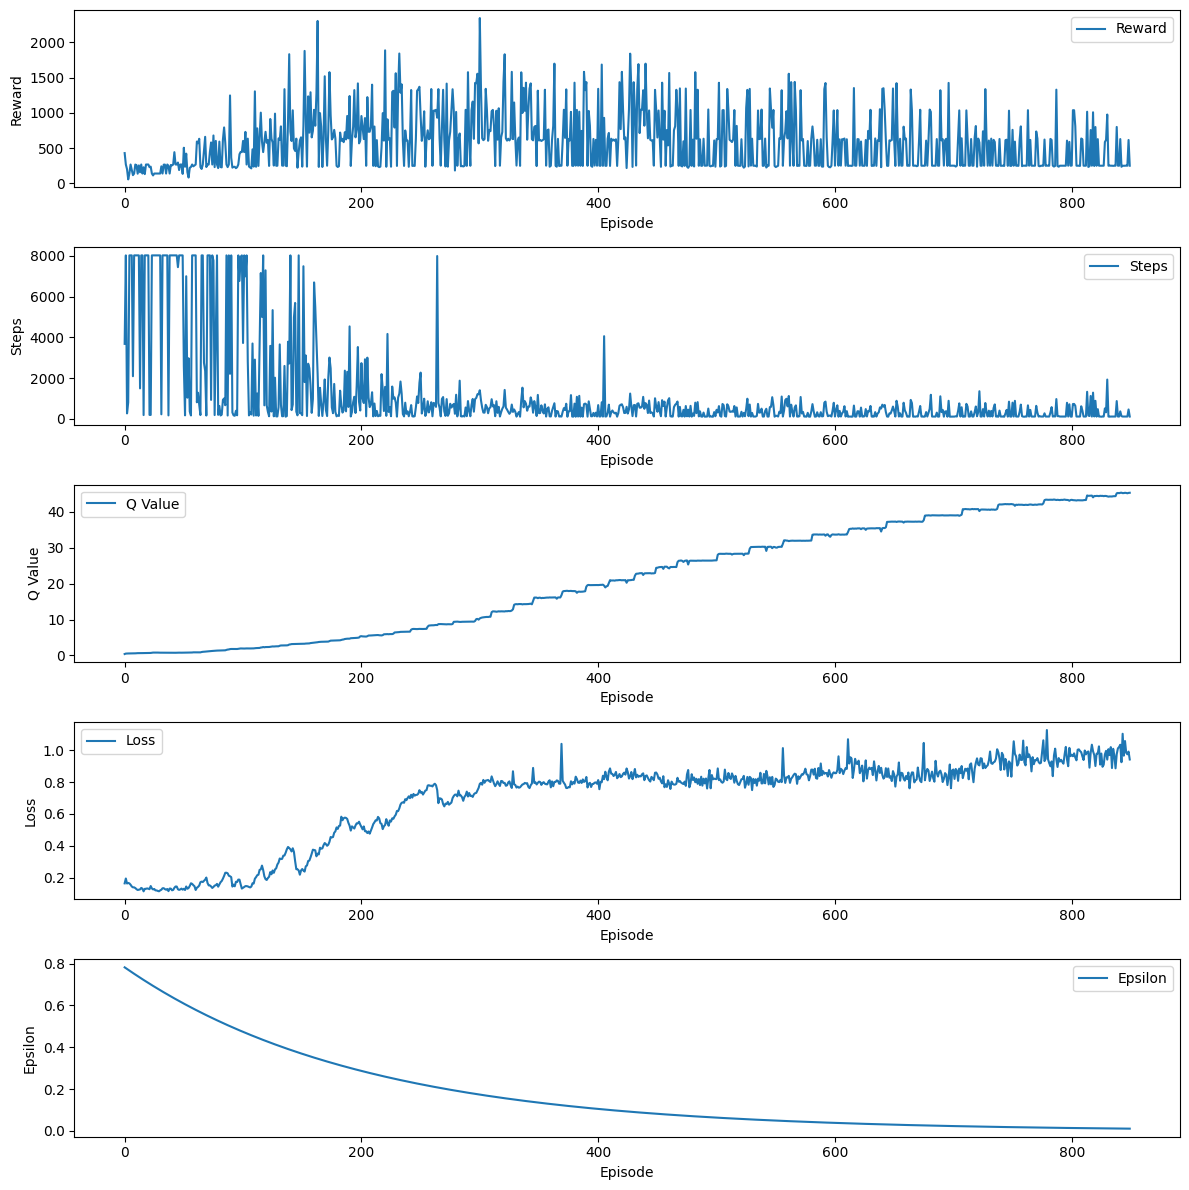

Episode 851 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 248.0, Epsilon: 0.011039504743095268


Episode 852 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.01098430721937979


Episode 853 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.010929385683282892


Episode 854 abgeschlossen mit 336 Schritten, Gesamtbelohnung: 107.0, Epsilon: 0.010874738754866477


Episode 855 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.010820365061092144


Episode 856 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 250.0, Epsilon: 0.010766263235786683


Episode 857 abgeschlossen mit 112 Schritten, Gesamtbelohnung: 249.0, Epsilon: 0.01071243191960775


Episode 858 abgeschlossen mit 1842 Schritten, Gesamtbelohnung: 982.0, Epsilon: 0.010658869760009713


Episode 859 abgeschlossen mit 114 Schritten, Gesamtbelohnung: 249.0, Epsilon: 0.010605575411209664


Episode 860 abgeschlossen mit 120 Schritten, Gesamtbelohnung: 249.0, Epsilon: 0.010552547534

PermissionError: [Errno 13] Permission denied: 'c:\\Users\\nicho\\OneDrive\\Dokumente\\A - DHBW\\6. Semester\\Reinforcement Learning\\Abgaben\\Coding\\Reinforcement-Learning\\videos\\openaigym.video.0.5468.video000874.meta.json'

In [4]:
for episode in range(1, num_episodes + 1):
    state = env.reset()
    total_reward = 0
    steps = 0
    mean_episode_q = []
    mean_episode_loss = []
    # Initiate loop for the current episode to play the game until it ends
    while True:
        # To visualize the training, uncomment the following line
        # env.render()
        action = mario.selectAction(state)
        next_state, reward, resetnow, info = env.step(action)
        mario.saveExp(state, action, next_state, reward, resetnow)
        q, loss = mario.learn_get_TDest_loss()
        state = next_state
        total_reward = total_reward + reward
        steps = steps + 1
        mean_episode_q.append(q)
        mean_episode_loss.append(loss)
        if resetnow or info["flag_get"]:
            break
    print(
        f"Episode {episode} abgeschlossen mit {steps} Schritten, Gesamtbelohnung: {total_reward}, Epsilon: {mario.epsilon}\n\n"
    )
    # Save the results of the current episode
    reward_list.append(total_reward)
    steps_list.append(steps)
    q_list.append(np.mean(mean_episode_q))
    loss_list.append(np.mean(mean_episode_loss))
    epsilon_list.append(mario.epsilon)

    # Plot the results of all episodes at the defined intervals
    if episode % plot_every == 0:
        plot_results(
            reward_list,
            steps_list,
            q_list,
            loss_list,
            epsilon_list,
            os.path.join(plot_folder, f"plot_{episode}.png"),
        )

    # Save the model at the defined intervals
    if episode % save_every == 0:
        torch.save(
            dict(
                model=mario.model.state_dict(),
                optimizer=mario.optimizer.state_dict(),
                epsilon=mario.epsilon,
            ),
            os.path.join(checkpoint_folder, f"model_ep{episode}.pth"),
        )

    # Decay the epsilon value at the end of each episode
    mario.decayEpsilon()

# Save the final model after all episodes are completed
torch.save(
    dict(
        model=mario.model.state_dict(),
        optimizer=mario.optimizer.state_dict(),
        epsilon=mario.epsilon,
    ),
    os.path.join(model_folder, f"final_model.pth"),
)

# Close the environment
env.close()